In [48]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lem=WordNetLemmatizer()
import seaborn as sn
import scipy.stats as st
import re
from collections import Counter
from wordcloud import WordCloud
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
%pylab inline
x, y = np.ogrid[100:500, :600]
mask = ((x - 300)/2) ** 2 + ((y - 300)/3) ** 2 > 100 ** 2
mask = 255 * mask.astype(int)


Populating the interactive namespace from numpy and matplotlib


In [49]:
cd /home/samuel/Documents/Data/Axiom/Yemen/UNESCO

/home/samuel/Documents/Data/Axiom/Yemen/UNESCO


In [50]:
ls

 assign_names.ipynb                          data_test.csv
'CFW HH UNESCO-Kobo form_samuel.xlsx'        data.xls
'CFW HH UNESCO-Kobo form_sentsamuel2.xlsx'   data.xlsx
 coding2.csv                                 kobo.csv
 coding.csv                                  kobo.xlsx
 DashBoard/                                  olds/
 data1.xlsx                                  questions_auto.csv
 data2.xlsx                                  questions.csv
 data.csv                                    UNESCO.ipynb
 data_nonCFW.xlsx


In [51]:
data=pd.read_csv('data.csv',sep='\t',index_col='UniqueID',decimal=',')
data2=pd.read_csv('data.csv',sep='\t',index_col='UniqueID',decimal=',')


In [52]:
question=pd.read_csv('questions.csv',sep='\t',index_col=None)
question.drop([i for i in question if 'Unnamed' in i],axis=1,inplace=True)
question=question.T
question.columns=['parent', 'type', 'Treatment','Other', 'question',]
question


,parent,type,Treatment,Other,question
Idquest,parent,type,Treatment,Other,NaN
UniqueID,NaN,NaN,NaN,NaN,UNIQUE ID
gender resp,NaN,NaN,NaN,NaN,Gender of the respondent:
age,NaN,continue,NaN,NaN,Enter age of respondent
Head_Household,NaN,NaN,NaN,NaN,Is the respondent the head of the household:
...,...,...,...,...,...
cashspend_HH_member_%,NaN,continue,NaN,NaN,Percentage of adults contributing in decisions...
cashspend_Women%,NaN,continue,NaN,NaN,Part of women in the decisions on how CFW cash...
cashspend_age_ponderated,NaN,continue,NaN,NaN,Ponderated age of decisionmakers on how CFW ca...
Total_CFW_earned_USD,NaN,continue,NaN,NaN,Total CFW cash earned by the household (in USD)


In [53]:
question[-question['parent'].isna()]

,parent,type,Treatment,Other,question
Idquest,parent,type,Treatment,Other,NaN


In [54]:
codes=question[question['Treatment'].isin(['to code','cat'])]
codes

,parent,type,Treatment,Other,question
increased_exp Sorghum,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Wheat flour,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Maize,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Sugar,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Veg Oil,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Milk,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Rice,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Meat,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Fish,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...
increased_exp Tea leaves,NaN,NaN,cat,NaN,C5) The cash received allowed you to increase ...


In [55]:
data

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,15/02/2022 13:17:28,15/02/2022 13:53:46,15/02/2022,collect:NjBan8DLb4REGrj2,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,15/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,15/02/2022 13:56:15,15/02/2022 14:24:54,15/02/2022,collect:NjBan8DLb4REGrj2,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,15/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15/02/2022 14:35:26,15/02/2022 14:54:32,15/02/2022,collect:NjBan8DLb4REGrj2,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,15/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,15/02/2022 14:55:30,15/02/2022 15:14:23,15/02/2022,collect:NjBan8DLb4REGrj2,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,15/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,13/02/2022 22:24:37,14/02/2022 11:26:10,13/02/2022,collect:Z9JnoczBvg5qQsdw,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,14/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,18/02/2022 19:56:50,18/02/2022 20:11:37,18/02/2022,collect:mpzpVM7z0V8PTNeg,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,18/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,18/02/2022 20:11:45,18/02/2022 20:51:10,18/02/2022,collect:mpzpVM7z0V8PTNeg,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,18/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,18/02/2022 20:52:52,18/02/2022 21:36:00,18/02/2022,collect:mpzpVM7z0V8PTNeg,0,audit.csv,https://kc.humanitarianresponse.info/media/ori...,Valid,0,18/02/2022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
data.drop([i for i in data if 'Unnamed' in i],axis=1,inplace=True)
data2.drop([i for i in data2 if 'Unnamed' in i],axis=1,inplace=True)
data

,gender resp,age,Head_Household,age HHH if no,gender_if_no,adults_num,gender1,age1,hh1,educ1,...,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,Male,21,No,55,Male,4,Male,55,Yes,Some secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,27,Yes,0,0,2,Male,27,Yes,University,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Female,21,No,50,Male,2,Male,50,Yes,Completed secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,56,No,73,Male,7,Male,73,Yes,Some primary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Male,33,Yes,0,0,2,Male,33,Yes,Completed secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Male,29,No,57,Male,5,Male,57,Yes,Completed secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Male,51,Yes,0,0,4,Male,51,Yes,Completed primary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Male,28,Yes,0,0,2,Male,28,Yes,University,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
coding=pd.DataFrame(columns=['Id','type','label','Coding','color'])
for i in codes.index:
    if codes.loc[i]['Treatment']=='to code':
        for j in data[i].unique():
            coding=coding.append({'Id':i,'type':codes.loc[i]['Treatment'],'label':j},ignore_index=True)
    elif codes.loc[i]['Treatment']=='cat':
        if codes.loc[i]['type']!='continue':
            coding=coding.append({'Id':i.split(' ')[0],'type':codes.loc[i]['Treatment'],'label':' '.join(i.split(' ')[1:])},ignore_index=True)

In [58]:
coding.to_csv('coding2.csv',sep='\t')

In [59]:
coding=pd.read_csv('coding.csv',sep='\t',decimal=',')

In [60]:
coding

,list name,name,label,coding,color
0,yesno,1,Yes,NaN,green
1,yesno,2,No,NaN,red
2,testvalid,1,Valid,NaN,NaN
3,testvalid,2,Test,NaN,NaN
4,gender,1,Male,NaN,NaN
...,...,...,...,...,...
58,cashusage,24,Tools,NaN,NaN
59,cashusage,25,Books,NaN,NaN
60,cashusage,26,Education,NaN,NaN
61,yesnoi,1,It was NOT as high as it should have been,NaN,NaN


In [61]:
coding.to_csv('./DashBoard/codes.csv',sep='\t',index=None)

In [62]:
data.drop([i for i in data.columns if 'Unnamed:' in i],axis=1,inplace=True)
data2.drop([i for i in data.columns if 'Unnamed:' in i],axis=1,inplace=True)
data.shape

(103, 249)

In [63]:
text=[i for i in question.index if question.loc[i]['Treatment']=='text']
text

['why',
 'selected_explain',
 'trainings',
 'salary_explain',
 'salarydecision_explain',
 'changes',
 'youth',
 'reasonJan',
 'reasonFeb',
 'reasonMar',
 'reasonApril',
 'reasonMay',
 'reasonJune',
 'reasonJuly',
 'reasonAug',
 'reasonSep',
 'reasonOct',
 'reasonNov',
 'reasonDec',
 'Livelihood category',
 'skills',
 'income_generation',
 'More_work_no_explain',
 'learning1',
 'learning2',
 'learning3',
 'protection_learning1',
 'protection_learning2',
 'protection_learning3']

In [64]:
for i in data:
    if data[i].dtype=='object' and i not in text:
        print(i,'\t\t ###### ', question.loc[i]['Treatment'], '\n', data[i].unique())
data.shape

gender resp 		 ######  nan 
 ['Male' 'Female']
Head_Household 		 ######  nan 
 ['No' 'Yes']
gender_if_no 		 ######  nan 
 ['Male' '0' 'Female']
gender1 		 ######  drop 
 ['Male' 'Female']
hh1 		 ######  drop 
 ['Yes' 'No']
educ1 		 ######  drop 
 ['Some secondary school' 'University' 'Completed secondary school'
 'Some primary school' 'Completed primary school' 'No formal education'
 'Koranic school' 'Vocational']
contrib1 		 ######  drop 
 ['Yes' 'No']
gender2 		 ######  drop 
 ['Male' 'Female' '0']
hh2 		 ######  drop 
 ['0' 'No' 'Yes']
educ2 		 ######  drop 
 ['Completed secondary school' 'Some secondary school'
 'Some primary school' 'Completed primary school' 'No formal education'
 'Koranic school' 'University' '0' 'Vocational']
contrib2 		 ######  drop 
 ['No' 'Yes' '0']
gender3 		 ######  drop 
 ['Female' '0' 'Male']
hh3 		 ######  drop 
 ['0' 'No' 'Yes']
educ3 		 ######  drop 
 ['Completed secondary school' '0' 'Some secondary school'
 'No formal education' 'Some primary school

(103, 249)

In [65]:
data

,gender resp,age,Head_Household,age HHH if no,gender_if_no,adults_num,gender1,age1,hh1,educ1,...,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,Male,21,No,55,Male,4,Male,55,Yes,Some secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Male,27,Yes,0,0,2,Male,27,Yes,University,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Female,21,No,50,Male,2,Male,50,Yes,Completed secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Female,56,No,73,Male,7,Male,73,Yes,Some primary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Male,33,Yes,0,0,2,Male,33,Yes,Completed secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Male,29,No,57,Male,5,Male,57,Yes,Completed secondary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Male,51,Yes,0,0,4,Male,51,Yes,Completed primary school,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,Male,28,Yes,0,0,2,Male,28,Yes,University,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
#question.to_csv('./DashBoard/questions.csv',sep='\t')

In [67]:
dummy=[i for i in question.index if question.loc[i]['Treatment']=='dummy']
cont_feat=[i for i in question.index if question.loc[i]['type']=='continue']
to_code=[i for i in question.index if question.loc[i]['Treatment']=='to code']
categorical=[i for i in question.index if question.loc[i]['Treatment']=='cat']
text=[i for i in question.index if question.loc[i]['Treatment']=='text']
catno=[i for i in categorical if question.loc[i]['Treatment']=='catno']
to_drop=[i for i in question.index if question.loc[i]['Treatment']=='drop']
visual=[i for i in question.index if question.loc[i]['Other']=='Viz']
sankey=[i for i in question.index if question.loc[i]['Other']=='Sankey']

In [68]:
sankey

['use1', 'use2', 'use3']

In [69]:
categorical

['increased_exp Sorghum',
 'increased_exp Wheat flour',
 'increased_exp Maize',
 'increased_exp Sugar',
 'increased_exp Veg Oil',
 'increased_exp Milk',
 'increased_exp Rice',
 'increased_exp Meat',
 'increased_exp Fish',
 'increased_exp Tea leaves',
 'increased_exp Salt',
 'increased_exp Cow pea',
 'increased_exp Pasta',
 'increased_exp Fruits',
 'increased_exp Soap',
 'increased_exp Water',
 'increased_exp Health',
 'increased_exp Clothes',
 'increased_exp School - Madrassa',
 'increased_exp School - Formal',
 'increased_exp Kerozene',
 'increased_exp Firewood',
 'increased_exp Qhat',
 'increased_exp Tools',
 'increased_exp Books',
 'increased_exp Education',
 'increased_exp Not form above',
 'diffcult_months January',
 'diffcult_months February',
 'diffcult_months March',
 'diffcult_months April',
 'diffcult_months May',
 'diffcult_months June',
 'diffcult_months July',
 'diffcult_months August',
 'diffcult_months September',
 'diffcult_months October',
 'diffcult_months November',


In [70]:
len(to_drop)

107

# catno

In [71]:
for i in catno:
    print(data[i].unique())

In [72]:
for i in catno:
    data[i]=data[i].apply(lambda x: 0 if x=='Yes' else 1)
    data2[i]=data2[i].apply(lambda x: 0 if x=='Yes' else 1)

In [73]:
categorical

['increased_exp Sorghum',
 'increased_exp Wheat flour',
 'increased_exp Maize',
 'increased_exp Sugar',
 'increased_exp Veg Oil',
 'increased_exp Milk',
 'increased_exp Rice',
 'increased_exp Meat',
 'increased_exp Fish',
 'increased_exp Tea leaves',
 'increased_exp Salt',
 'increased_exp Cow pea',
 'increased_exp Pasta',
 'increased_exp Fruits',
 'increased_exp Soap',
 'increased_exp Water',
 'increased_exp Health',
 'increased_exp Clothes',
 'increased_exp School - Madrassa',
 'increased_exp School - Formal',
 'increased_exp Kerozene',
 'increased_exp Firewood',
 'increased_exp Qhat',
 'increased_exp Tools',
 'increased_exp Books',
 'increased_exp Education',
 'increased_exp Not form above',
 'diffcult_months January',
 'diffcult_months February',
 'diffcult_months March',
 'diffcult_months April',
 'diffcult_months May',
 'diffcult_months June',
 'diffcult_months July',
 'diffcult_months August',
 'diffcult_months September',
 'diffcult_months October',
 'diffcult_months November',


In [74]:
for i in categorical:
    if not set(data[i].unique()).issubset(set([0,1])):
        print(i,data[i].unique())

# Dummies

In [75]:
n=len(data)
n

103

In [76]:
dummy

['use1', 'Village_clean']

In [77]:
for i in dummy:
    print(i,Counter(data[i]))

use1 Counter({'Wheat flour': 21, 'Rice': 20, 'Qhat': 15, 'Not form above': 10, 'Clothes': 7, 'Health': 5, 'Education': 4, 'Tools': 4, 'Meat': 4, 'Veg Oil': 3, 'Water': 3, 'Milk': 2, 'School - Madrassa': 2, 'Fish': 1, 'Sorghum': 1, 'Tea leaves': 1})
Village_clean Counter({'Hadah': 13, 'Alqatie': 13, 'Bayt bus': 13, 'Aljamie': 13, 'Hayu aleumaal': 13, "Anma'": 13, 'Al-Samoud neighborhood alone, the martyr Badr': 12, "Sanea' alqadimuh": 10, 'Zubid': 3})


In [78]:
# On remplace toutes les valeurs qui représente moins de 8% par Other
for feat in dummy:
    L=[i for i in data[feat].unique() if len(data[data[feat]==i])/n>0.08]
    data[feat]=data[feat].apply(lambda x:x if x in L else 'Other_drop')

In [79]:
#check
for i in dummy:
    print(i,Counter(data[i]))

use1 Counter({'Other_drop': 37, 'Wheat flour': 21, 'Rice': 20, 'Qhat': 15, 'Not form above': 10})
Village_clean Counter({'Hadah': 13, 'Alqatie': 13, 'Bayt bus': 13, 'Aljamie': 13, 'Hayu aleumaal': 13, "Anma'": 13, 'Al-Samoud neighborhood alone, the martyr Badr': 12, "Sanea' alqadimuh": 10, 'Other_drop': 3})


In [80]:
data[[i for i in data.columns if 'educ' in i]]

,educ1,educ2,educ3,educ4,educ5,educ6,educ7,educ8,educ9,educ10,educ_mean,educ_highest,educ_median
UniqueID,,,,,,,,,,,,,
4,Some secondary school,Completed secondary school,Completed secondary school,Completed secondary school,0,0,0,0,0,0,NaN,NaN,NaN
5,University,Some secondary school,0,0,0,0,0,0,0,0,NaN,NaN,NaN
6,Completed secondary school,Some secondary school,0,0,0,0,0,0,0,0,NaN,NaN,NaN
7,Some primary school,Some primary school,Some secondary school,Completed primary school,Completed primary school,Some primary school,Some primary school,0,0,0,NaN,NaN,NaN
8,Completed secondary school,Completed primary school,0,0,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Completed secondary school,No formal education,Completed secondary school,Completed secondary school,Completed secondary school,0,0,0,0,0,NaN,NaN,NaN
104,Completed primary school,Completed secondary school,Some secondary school,Completed primary school,0,0,0,0,0,0,NaN,NaN,NaN
105,University,Completed secondary school,0,0,0,0,0,0,0,0,NaN,NaN,NaN


# Gender/Age

In [81]:
data2["gender HHH"]=data2.apply(lambda row:row["gender resp"] if row["Head_Household"]=='Yes' else row["gender_if_no"],axis=1)
data["gender HHH"]=data.apply(lambda row:row["gender resp"] if row["Head_Household"]=='Yes' else row["gender_if_no"],axis=1)


In [82]:
data2["age HHH"]=data2.apply(lambda row:row["age"] if row["Head_Household"]=='Yes' else row["age HHH if no"],axis=1)
data["age HHH"]=data.apply(lambda row:row["age"] if row["Head_Household"]=='Yes' else row["age HHH if no"],axis=1)

In [83]:
#check
data[["gender HHH","gender resp","gender_if_no","Head_Household",'age',"age HHH if no","age HHH"]].tail(20)


,gender HHH,gender resp,gender_if_no,Head_Household,age,age HHH if no,age HHH
UniqueID,,,,,,,
88,Male,Male,Male,No,24,50,50
89,Male,Male,0,Yes,32,0,32
90,Female,Female,Female,No,23,50,50
91,Male,Female,Male,No,30,50,50
92,Female,Female,Female,No,27,63,63
93,Male,Male,0,Yes,33,0,33
94,Male,Male,0,Yes,28,0,28
95,Male,Male,0,Yes,23,0,23
96,Male,Male,0,Yes,43,0,43


In [84]:
data.drop(["gender_if_no","age HHH if no"],axis=1,inplace=True)
data2.drop(["gender_if_no","age HHH if no"],axis=1,inplace=True)

# Family Composition

In [85]:
education={'No formal education':0,'Koranic school':1,'Some primary school':2,'Completed primary school':3,\
     'Some secondary school':4,'Completed secondary school':5,'University':6,'Vocational':4,'0':np.nan}
data['male%']=data[['gender'+str(i) for i in range(1,11)]].applymap(lambda x: 1 if x=='Male' else 0).T.sum().T/data['adults_num']*100
data['age_mean']=data[['age'+str(i) for i in range(1,11)]].applymap(lambda x:x if x!=0 else np.nan).T.mean().T
data['age_median']=data[['age'+str(i) for i in range(1,11)]].applymap(lambda x:x if x!=0 else np.nan).T.median().T
data['educ_mean']=np.round(data[['educ'+str(i) for i in range(1,11)]].applymap(lambda x: education[x]).T.mean().T,0)
data['educ_highest']=np.round(data[['educ'+str(i) for i in range(1,11)]].applymap(lambda x: education[x]).T.max().T,0)
data['educ_median']=np.round(data[['educ'+str(i) for i in range(1,11)]].applymap(lambda x: education[x]).T.median().T,0)
data['contrib%']=data[['contrib'+str(i) for i in range(1,11)]].applymap(lambda x: 1 if x=='Yes' else 0).T.sum().T/data['adults_num']*100
data['contrib_tot']=data[['contrib'+str(i) for i in range(1,11)]].applymap(lambda x: 1 if x=='Yes' else 0).T.sum().T
data['femalecontrib%']=pd.DataFrame(data[['gender'+str(i) for i in range(1,11)]].applymap(lambda x: 1 if x=='Female' else 0).values*\
                                    data[['contrib'+str(i) for i in range(1,11)]].applymap(lambda x: 1 if x=='Yes' else 0).values,\
                                    index=data.index).T.sum()/data['contrib_tot']*100

In [86]:
#check
data[[i for i in data.columns][-20:]]

,male%,age_mean,age_median,educ_mean,educ_highest,educ_median,contrib%,contrib_tot,femalecontrib%,age HHH,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember
UniqueID,,,,,,,,,,,,,,,,,,,,
4,75.000000,33.50,30.0,5.0,5.0,5.0,50.000000,2,50.0,55,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,50.000000,26.00,26.0,5.0,6.0,5.0,50.000000,1,0.0,27,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,50.000000,35.50,35.5,4.0,5.0,4.0,50.000000,1,0.0,50,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,42.857143,44.00,38.0,3.0,4.0,2.0,28.571429,2,0.0,73,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,50.000000,31.50,31.5,4.0,5.0,4.0,50.000000,1,0.0,33,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,60.000000,35.20,29.0,4.0,5.0,5.0,40.000000,2,0.0,57,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,25.000000,27.75,21.0,4.0,5.0,4.0,25.000000,1,0.0,51,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,50.000000,27.00,27.0,6.0,6.0,6.0,50.000000,1,0.0,28,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
data2['educ_mean']=data['educ_mean'].apply(lambda x: 0 if x!=x else [i for i in education if education[i]==x][0])
data2['educ_highest']=data['educ_highest'].apply(lambda x: 0 if x!=x else [i for i in education if education[i]==x][0])
data2['educ_median']=data['educ_median'].apply(lambda x: 0 if x!=x else [i for i in education if education[i]==x][0])

In [88]:
#Check
data2[[i for i in data.columns][-20:]]

,male%,age_mean,age_median,educ_mean,educ_highest,educ_median,contrib%,contrib_tot,femalecontrib%,age HHH,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember
UniqueID,,,,,,,,,,,,,,,,,,,,
4,NaN,NaN,NaN,Completed secondary school,Completed secondary school,Completed secondary school,NaN,NaN,NaN,55,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,Completed secondary school,University,Completed secondary school,NaN,NaN,NaN,27,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,Some secondary school,Completed secondary school,Some secondary school,NaN,NaN,NaN,50,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,Completed primary school,Some secondary school,Some primary school,NaN,NaN,NaN,73,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,Some secondary school,Completed secondary school,Some secondary school,NaN,NaN,NaN,33,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,NaN,NaN,NaN,Some secondary school,Completed secondary school,Completed secondary school,NaN,NaN,NaN,57,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,Some secondary school,Completed secondary school,Some secondary school,NaN,NaN,NaN,51,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,University,University,University,NaN,NaN,NaN,28,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
data[['cfw_gend'+str(i) for i in range(1,6)]].applymap(lambda x: 1 if x in ['Female','Male'] else 0).T.sum().T

UniqueID
4      1
5      2
6      1
7      1
8      1
      ..
103    2
104    1
105    0
106    1
107    1
Length: 103, dtype: int64

In [90]:
data['adults_num']

UniqueID
4      4
5      2
6      2
7      7
8      2
      ..
103    5
104    4
105    2
106    2
107    4
Name: adults_num, Length: 103, dtype: int64

In [91]:
data[['cfw_gend'+str(i) for i in range(1,6)]].applymap(lambda x: 1 if x in ['Female','Male'] else 0).T.sum().T/data['adults_num']*100

UniqueID
4       25.000000
5      100.000000
6       50.000000
7       14.285714
8       50.000000
          ...    
103     40.000000
104     25.000000
105      0.000000
106     50.000000
107     25.000000
Length: 103, dtype: float64

In [92]:
data['cfw_worker_HH%']=data[['cfw_gend'+str(i) for i in range(1,6)]].applymap(lambda x: 1 if x in ['Female','Male'] else 0).T.sum().T/data['adults_num']*100
data['cfw_worker_women%']=data[['cfw_gend'+str(i) for i in range(1,6)]].applymap(lambda x: 1 if x in ['Female'] else 0).T.sum().T/data['cfw_worker_num']*100
data['cfw_worker_age_mean']=data[['cfw_age'+str(i) for i in range(1,6)]].applymap(lambda x:x if x!=0 else np.nan).T.mean().T
data['cfw_worker_age_median']=data[['cfw_age'+str(i) for i in range(1,6)]].applymap(lambda x:x if x!=0 else np.nan).T.median().T

In [93]:
data[[i for i in data.columns if 'cfw_' in i]]

,cfw_participation,cfw_worker_num,cfw_age1,cfw_gend1,cfw_age2,cfw_gend2,cfw_age3,cfw_gend3,cfw_age4,cfw_gend4,cfw_age5,cfw_gend5,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median
UniqueID,,,,,,,,,,,,,,,,
4,Yes,1,21,Male,0,0,0,0,0,0,0,0,25.000000,0.0,21.0,21.0
5,Yes,2,27,Male,30,Male,0,0,0,0,0,0,100.000000,0.0,28.5,28.5
6,Yes,1,21,Female,0,0,0,0,0,0,0,0,50.000000,100.0,21.0,21.0
7,Yes,1,56,Female,0,0,0,0,0,0,0,0,14.285714,100.0,56.0,56.0
8,Yes,1,33,Male,0,0,0,0,0,0,0,0,50.000000,0.0,33.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Yes,2,29,Male,31,Male,0,0,0,0,0,0,40.000000,0.0,30.0,30.0
104,Yes,1,22,Male,0,0,0,0,0,0,0,0,25.000000,0.0,22.0,22.0
105,Yes,0,0,0,0,0,0,0,0,0,0,0,0.000000,NaN,NaN,NaN


# !!!!! Voir les Pourcentages si ils collent !!!!!!!

In [94]:
data['cashspend_HH_member_%']=data[['spend_gend'+str(i) for i in range(1,6)]].applymap(lambda x: 1 if x in ['Female','Male'] else 0).T.sum().T/data['adults_num']*100
data['cashspend_Women%']=pd.DataFrame(data[['spend_gend'+str(i) for i in range(1,6)]].applymap(lambda x: 1 if x=='Female' else 0).values*\
                                    data[['spend_influencer'+str(i) for i in range(1,6)]].values,\
                                    index=data.index).T.sum()
data['cashspend_age_ponderated']=pd.DataFrame(data[['spend_age'+str(i) for i in range(1,6)]].values*\
                                    data[['spend_influencer'+str(i) for i in range(1,6)]].values,\
                                    index=data.index).T.sum()/100

In [95]:
data[['adults_num']+[i for i in data.columns if 'spend_' in i]].head(22)

,adults_num,cashspend_num,spend_age1,spend_gend1,spend_influencer1,spend_age2,spend_gend2,spend_influencer2,spend_age3,spend_gend3,spend_influencer3,spend_age4,spend_gend4,spend_influencer4,spend_age5,spend_gend5,spend_influencer5,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated
UniqueID,,,,,,,,,,,,,,,,,,,,
4,4,2,55,Male,50,39,Female,50,0,0,0,0,0,0,0,0,0,50.000000,50,47.00
5,2,1,27,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,0,27.00
6,2,1,50,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,0,50.00
7,7,2,56,Male,50,73,Female,50,0,0,0,0,0,0,0,0,0,28.571429,50,64.50
8,2,1,33,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,0,33.00
9,2,1,46,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,0,46.00
10,4,1,31,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,25.000000,0,31.00
11,4,1,64,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,25.000000,0,64.00
12,2,1,34,Male,100,0,0,0,0,0,0,0,0,0,0,0,0,50.000000,0,34.00


In [96]:
# 1$=250YER
data['Total_CFW_earned_USD']=pd.DataFrame(data[['currency'+str(i) for i in range(1,8)]].applymap(lambda x: 1 if x=='USD' else 0).values*\
                                    data[['amount'+str(i) for i in range(1,8)]].values+data[['amount'+str(i) for i in range(1,8)]].values/250*\
                                    data[['currency'+str(i) for i in range(1,8)]].applymap(lambda x: 1 if x=='YER' else 0).values,\
                                    index=data.index).T.sum()


data['Total_CFW_earned_per_familymember']=data['Total_CFW_earned_USD']/data['totalhhcompo']


In [97]:
data[['Total_CFW_earned_USD']+[i for i in data if 'currency' in i or 'amount' in i ]].head(22)

,Total_CFW_earned_USD,currency1,amount1,currency2,amount2,currency3,amount3,currency4,amount4,currency5,amount5,currency6,amount6,currency7,amount7
UniqueID,,,,,,,,,,,,,,,
4,150.0,USD,75.0,USD,75.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
5,400.0,USD,100.0,USD,100.0,USD,100.0,USD,100.0,0,0.0,0,0.0,0,0.0
6,7.0,USD,7.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
7,116.0,USD,58.0,USD,58.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
8,82.0,USD,40.0,0,0.0,0,0.0,USD,42.0,0,0.0,0,0.0,0,0.0
9,93.0,USD,93.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
10,33.0,USD,15.0,USD,18.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
11,264.0,USD,264.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
12,100.0,USD,100.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0


In [98]:
data[[i for i in data if 'usage' in i[:6]]].head(22)

,usage1,usage2,usage3,usage4,usage5,usage6,usage7,usage8,usage9,usage10,...,usage17,usage18,usage19,usage20,usage21,usage22,usage23,usage24,usage25,usage26
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,0,33.0,0.0,0.0,33.0,0.0,0.0,0.0,0,0.0,...,0.0,83.0,0,0,0.0,0,0.0,0.0,0,0.0
5,0,0.0,0.0,125.0,0.0,0.0,120.0,0.0,0,0.0,...,250.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0
6,0,0.0,0.0,2.0,3.0,1.0,0.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0
7,0,25.0,0.0,0.0,16.0,0.0,14.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0
8,0,0.0,0.0,0.0,0.0,12.0,31.0,0.0,0,0.0,...,0.0,0.0,0,0,0.0,0,39.0,0.0,0,0.0
9,0,12.0,0.0,0.0,0.0,20.0,31.0,10.0,10,0.0,...,0.0,0.0,0,0,0.0,0,10.0,0.0,0,0.0
10,0,10.0,0.0,0.0,0.0,0.0,10.0,0.0,0,0.0,...,13.0,0.0,0,0,0.0,0,0.0,0.0,0,0.0
11,0,30.0,0.0,10.0,0.0,0.0,30.0,20.0,10,0.0,...,10.0,0.0,10,0,0.0,0,20.0,0.0,0,15.0
12,0,0.0,0.0,7.0,6.0,20.0,20.0,10.0,5,4.0,...,10.0,0.0,0,0,0.0,0,20.0,0.0,0,8.0


In [99]:
a=data[[i for i in data if 'usage' in i[:6]]].T.sum().T

In [100]:
for feat in [i for i in data if 'usage' in i[:6]]:
    data[feat]=data[feat]/a*100
data[[i for i in data if 'usage' in i[:6]]].head(22)

,usage1,usage2,usage3,usage4,usage5,usage6,usage7,usage8,usage9,usage10,...,usage17,usage18,usage19,usage20,usage21,usage22,usage23,usage24,usage25,usage26
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,0.000000,22.147651,0.0,0.000000,22.147651,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,55.704698,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
5,0.000000,0.000000,0.0,25.252525,0.000000,0.000000,24.242424,0.000000,0.000000,0.000000,...,50.505051,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
6,0.000000,0.000000,0.0,33.333333,50.000000,16.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
7,0.000000,45.454545,0.0,0.000000,29.090909,0.000000,25.454545,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
8,0.000000,0.000000,0.0,0.000000,0.000000,14.634146,37.804878,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,47.560976,0.000000,0.0,0.000000
9,0.000000,12.903226,0.0,0.000000,0.000000,21.505376,33.333333,10.752688,10.752688,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,10.752688,0.000000,0.0,0.000000
10,0.000000,30.303030,0.0,0.000000,0.000000,0.000000,30.303030,0.000000,0.000000,0.000000,...,39.393939,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
11,0.000000,18.292683,0.0,6.097561,0.000000,0.000000,18.292683,12.195122,6.097561,0.000000,...,6.097561,0.000000,6.097561,0.0,0.000000,0.0,12.195122,0.000000,0.0,9.146341
12,0.000000,0.000000,0.0,5.932203,5.084746,16.949153,16.949153,8.474576,4.237288,3.389831,...,8.474576,0.000000,0.000000,0.0,0.000000,0.0,16.949153,0.000000,0.0,6.779661


# YesNo

In [101]:
for i in data.columns:
    if set(data[i].unique()).issubset(set(['Yes','No',np.nan,'0'])): 
        data[i]=data[i].apply(lambda x: 1 if x=='Yes' else 0)
    if set(data[i].unique()).issubset(set(['Yes','No',"Don't know",'0'])): 
        data[i]=data[i].apply(lambda x: 1 if x=='Yes' else 0)

# Individual questions

# To Code

In [102]:
#data.drop([246],axis=0,inplace=True)

In [103]:
for i in to_code:
    print(i,Counter(data[i]))

In [104]:
coding

,list name,name,label,coding,color
0,yesno,1,Yes,NaN,green
1,yesno,2,No,NaN,red
2,testvalid,1,Valid,NaN,NaN
3,testvalid,2,Test,NaN,NaN
4,gender,1,Male,NaN,NaN
...,...,...,...,...,...
58,cashusage,24,Tools,NaN,NaN
59,cashusage,25,Books,NaN,NaN
60,cashusage,26,Education,NaN,NaN
61,yesnoi,1,It was NOT as high as it should have been,NaN,NaN


In [105]:
for i in to_code:
    if i!= 'gender resp':
        print(i,coding[coding['Id']==i])

In [106]:
coding

,list name,name,label,coding,color
0,yesno,1,Yes,NaN,green
1,yesno,2,No,NaN,red
2,testvalid,1,Valid,NaN,NaN
3,testvalid,2,Test,NaN,NaN
4,gender,1,Male,NaN,NaN
...,...,...,...,...,...
58,cashusage,24,Tools,NaN,NaN
59,cashusage,25,Books,NaN,NaN
60,cashusage,26,Education,NaN,NaN
61,yesnoi,1,It was NOT as high as it should have been,NaN,NaN


In [107]:
for i in to_code:
    temp=coding[coding['Id']==i].copy()
    data[i]=data[i].apply(lambda x:float(888 if x not in temp['label'].unique() else temp[temp['label']==x]['Coding'].values[0]))

In [108]:
data[to_code]

""
UniqueID
4
5
6
7
8
...
103
104
105


In [109]:
data[to_code]

""
UniqueID
4
5
6
7
8
...
103
104
105


In [110]:
for i in to_code:
    print(i,Counter(data[i]))

In [111]:
data.shape[1]

247

# Treat 888


In [112]:
for i in data.columns:
    if 888 in data[i].unique():
        moyenne=data[data[i]!=888][i].mean()
        data[i]=data[i].apply(lambda x:x if x!=888 else moyenne)
        print(i,moyenne)

In [113]:
for i in to_code:
    print(i,Counter(data[i]),data[i].mean())

# Categorical data

In [114]:
data.drop(text,axis=1,inplace=True)

In [115]:
to_drop

['gender1',
 'age1',
 'hh1',
 'educ1',
 'contrib1',
 'gender2',
 'age2',
 'hh2',
 'educ2',
 'contrib2',
 'gender3',
 'age3',
 'hh3',
 'educ3',
 'contrib3',
 'gender4',
 'age4',
 'hh4',
 'educ4',
 'contrib4',
 'gender5',
 'age5',
 'hh5',
 'educ5',
 'contrib5',
 'gender6',
 'age6',
 'hh6',
 'educ6',
 'contrib6',
 'gender7',
 'age7',
 'hh7',
 'educ7',
 'contrib7',
 'gender8',
 'age8',
 'hh8',
 'educ8',
 'contrib8',
 'gender9',
 'age9',
 'hh9',
 'educ9',
 'contrib9',
 'gender10',
 'age10',
 'hh10',
 'educ10',
 'contrib10',
 'cfw_age1',
 'cfw_gend1',
 'cfw_age2',
 'cfw_gend2',
 'cfw_age3',
 'cfw_gend3',
 'cfw_age4',
 'cfw_gend4',
 'cfw_age5',
 'cfw_gend5',
 'spend_age1',
 'spend_gend1',
 'spend_influencer1',
 'spend_age2',
 'spend_gend2',
 'spend_influencer2',
 'spend_age3',
 'spend_gend3',
 'spend_influencer3',
 'spend_age4',
 'spend_gend4',
 'spend_influencer4',
 'spend_age5',
 'spend_gend5',
 'spend_influencer5',
 'slctmonth1',
 'daysworked1',
 'currency1',
 'amount1',
 'slctmonth2',
 'd

In [116]:
k=data.shape[1]
for i in dummy:
    k+=len(data[i].unique())
k-len(dummy)

230

In [117]:
#check
for i in data.columns:
    if i not in dummy:
        if data[i].dtype=='object':
            print(i,data[i].unique())

gender resp ['Male' 'Female']
gender1 ['Male' 'Female']
educ1 ['Some secondary school' 'University' 'Completed secondary school'
 'Some primary school' 'Completed primary school' 'No formal education'
 'Koranic school' 'Vocational']
gender2 ['Male' 'Female' '0']
educ2 ['Completed secondary school' 'Some secondary school'
 'Some primary school' 'Completed primary school' 'No formal education'
 'Koranic school' 'University' '0' 'Vocational']
gender3 ['Female' '0' 'Male']
educ3 ['Completed secondary school' '0' 'Some secondary school'
 'No formal education' 'Some primary school' 'University' 'Vocational'
 'Completed primary school']
gender4 ['Male' '0' 'Female']
educ4 ['Completed secondary school' '0' 'Completed primary school'
 'No formal education' 'Some secondary school' 'Some primary school'
 'University']
gender5 ['0' 'Female' 'Male']
educ5 ['0' 'Completed primary school' 'University' 'Some primary school'
 'Koranic school' 'Some secondary school' 'Completed secondary school'
 'No fo

In [118]:
data['gender HHH']=data['gender HHH'].apply(lambda x: 1 if x in ['Man','Male'] else 0)
data2['gender HHH']=data2['gender HHH'].apply(lambda x: 'Male' if x in ['Man','Male'] else x)

In [119]:
data2['gender HHH'].unique()

array(['Male', 'Female'], dtype=object)

In [120]:
to_drop

['gender1',
 'age1',
 'hh1',
 'educ1',
 'contrib1',
 'gender2',
 'age2',
 'hh2',
 'educ2',
 'contrib2',
 'gender3',
 'age3',
 'hh3',
 'educ3',
 'contrib3',
 'gender4',
 'age4',
 'hh4',
 'educ4',
 'contrib4',
 'gender5',
 'age5',
 'hh5',
 'educ5',
 'contrib5',
 'gender6',
 'age6',
 'hh6',
 'educ6',
 'contrib6',
 'gender7',
 'age7',
 'hh7',
 'educ7',
 'contrib7',
 'gender8',
 'age8',
 'hh8',
 'educ8',
 'contrib8',
 'gender9',
 'age9',
 'hh9',
 'educ9',
 'contrib9',
 'gender10',
 'age10',
 'hh10',
 'educ10',
 'contrib10',
 'cfw_age1',
 'cfw_gend1',
 'cfw_age2',
 'cfw_gend2',
 'cfw_age3',
 'cfw_gend3',
 'cfw_age4',
 'cfw_gend4',
 'cfw_age5',
 'cfw_gend5',
 'spend_age1',
 'spend_gend1',
 'spend_influencer1',
 'spend_age2',
 'spend_gend2',
 'spend_influencer2',
 'spend_age3',
 'spend_gend3',
 'spend_influencer3',
 'spend_age4',
 'spend_gend4',
 'spend_influencer4',
 'spend_age5',
 'spend_gend5',
 'spend_influencer5',
 'slctmonth1',
 'daysworked1',
 'currency1',
 'amount1',
 'slctmonth2',
 'd

In [121]:
data.head()

,gender resp,age,Head_Household,adults_num,gender1,age1,hh1,educ1,contrib1,gender2,...,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,Male,21,0,4,Male,55,1,Some secondary school,1,Male,...,1,25.000000,0.0,21.0,21.0,50.000000,50,47.0,150.0,25.000000
5,Male,27,1,2,Male,27,1,University,1,Female,...,1,100.000000,0.0,28.5,28.5,50.000000,0,27.0,400.0,133.333333
6,Female,21,0,2,Male,50,1,Completed secondary school,1,Female,...,1,50.000000,100.0,21.0,21.0,50.000000,0,50.0,7.0,2.333333
7,Female,56,0,7,Male,73,1,Some primary school,1,Male,...,1,14.285714,100.0,56.0,56.0,28.571429,50,64.5,116.0,12.888889
8,Male,33,1,2,Male,33,1,Completed secondary school,1,Female,...,1,50.000000,0.0,33.0,33.0,50.000000,0,33.0,82.0,20.500000


In [122]:
data.drop(to_drop,axis=1,inplace=True)
data.shape

(103, 111)

In [123]:
data['gender resp']=data['gender resp'].apply(lambda x:1 if x=='Male' else 0)
data['gender_supervisor']=data['gender_supervisor'].apply(lambda x:1 if x=='Male' else 0)

In [124]:
to_drop

['gender1',
 'age1',
 'hh1',
 'educ1',
 'contrib1',
 'gender2',
 'age2',
 'hh2',
 'educ2',
 'contrib2',
 'gender3',
 'age3',
 'hh3',
 'educ3',
 'contrib3',
 'gender4',
 'age4',
 'hh4',
 'educ4',
 'contrib4',
 'gender5',
 'age5',
 'hh5',
 'educ5',
 'contrib5',
 'gender6',
 'age6',
 'hh6',
 'educ6',
 'contrib6',
 'gender7',
 'age7',
 'hh7',
 'educ7',
 'contrib7',
 'gender8',
 'age8',
 'hh8',
 'educ8',
 'contrib8',
 'gender9',
 'age9',
 'hh9',
 'educ9',
 'contrib9',
 'gender10',
 'age10',
 'hh10',
 'educ10',
 'contrib10',
 'cfw_age1',
 'cfw_gend1',
 'cfw_age2',
 'cfw_gend2',
 'cfw_age3',
 'cfw_gend3',
 'cfw_age4',
 'cfw_gend4',
 'cfw_age5',
 'cfw_gend5',
 'spend_age1',
 'spend_gend1',
 'spend_influencer1',
 'spend_age2',
 'spend_gend2',
 'spend_influencer2',
 'spend_age3',
 'spend_gend3',
 'spend_influencer3',
 'spend_age4',
 'spend_gend4',
 'spend_influencer4',
 'spend_age5',
 'spend_gend5',
 'spend_influencer5',
 'slctmonth1',
 'daysworked1',
 'currency1',
 'amount1',
 'slctmonth2',
 'd

# data analysis

In [125]:
df = pd.get_dummies(data, columns=dummy)
df.shape

(103, 123)

In [126]:
df.drop([i for i in df.columns if i[-4:]=='drop' or i[-2:]=='_0'],axis=1,inplace=True)
df.shape

(103, 121)

In [127]:
#check
for i in df.columns:
    if df[i].dtype=='object':
        print(i)

In [128]:
data[[i for i in data if data[i].dtype=='object']]

,use1,Village_clean
UniqueID,,
4,Wheat flour,Hadah
5,Other_drop,Hadah
6,Other_drop,Hadah
7,Wheat flour,Hadah
8,Rice,"Al-Samoud neighborhood alone, the martyr Badr"
...,...,...
103,Qhat,Anma'
104,Rice,Anma'
105,Not form above,Anma'


In [129]:
check=df[[i for i in df.columns if df[i].isna().sum()>0]]
check

,usage1,usage2,usage3,usage4,usage5,usage6,usage7,usage8,usage9,usage10,...,usage20,usage21,usage22,usage23,usage24,usage25,usage26,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,0.000000,22.147651,0.000000,0.000000,22.147651,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,21.0,21.0
5,0.000000,0.000000,0.000000,25.252525,0.000000,0.000000,24.242424,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,28.5,28.5
6,0.000000,0.000000,0.000000,33.333333,50.000000,16.666667,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,100.0,21.0,21.0
7,0.000000,45.454545,0.000000,0.000000,29.090909,0.000000,25.454545,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,100.0,56.0,56.0
8,0.000000,0.000000,0.000000,0.000000,0.000000,14.634146,37.804878,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,47.560976,0.000000,0.0,0.0,0.0,33.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.000000,0.000000,0.000000,0.000000,22.857143,0.000000,34.285714,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,42.857143,0.000000,0.0,0.0,0.0,30.0,30.0
104,0.000000,8.333333,3.333333,13.333333,20.000000,0.000000,25.000000,0.000000,8.333333,3.333333,...,0.0,0.000000,0.000000,16.666667,0.000000,0.0,0.0,0.0,22.0,22.0
105,1.123596,4.494382,2.247191,4.494382,4.494382,1.123596,4.494382,1.123596,1.348315,0.674157,...,0.0,0.000000,13.483146,10.112360,4.494382,0.0,0.0,NaN,NaN,NaN


In [130]:
for i in [i for i in df if 'usage' in i]:
    df[i]=df[i].fillna(0)

In [131]:
for i in [i for i in df if 'usage' in i]:
    df[i]=df[i].fillna(0)
df['cfw_worker_women%']=df['cfw_worker_women%'].fillna(0)
df['cfw_worker_age_mean'].mean()
df['cfw_worker_age_mean']=df['cfw_worker_age_mean'].fillna(32.31)
df['cfw_worker_age_median']=df['cfw_worker_age_median'].fillna(32.31)

In [132]:
df['cfw_worker_age_mean'].mean()

32.30980582524271

In [133]:
df['cfw_worker_age_mean']=df['cfw_worker_age_mean'].fillna(32.31)

In [134]:
df['cfw_worker_age_median'].mean()

32.30980582524271

In [135]:
df['cfw_worker_age_median']=df['cfw_worker_age_median'].fillna(32.31)

In [136]:
df.drop([i for i in df.columns if df[i].sum()<6 and set(df[i].unique()).issubset(set([0,1]))],axis=1,inplace=True)

In [137]:
df.drop([i for i in df.columns if len(df[i].unique())==1],axis=1,inplace=True)

In [138]:
df.shape

(103, 107)

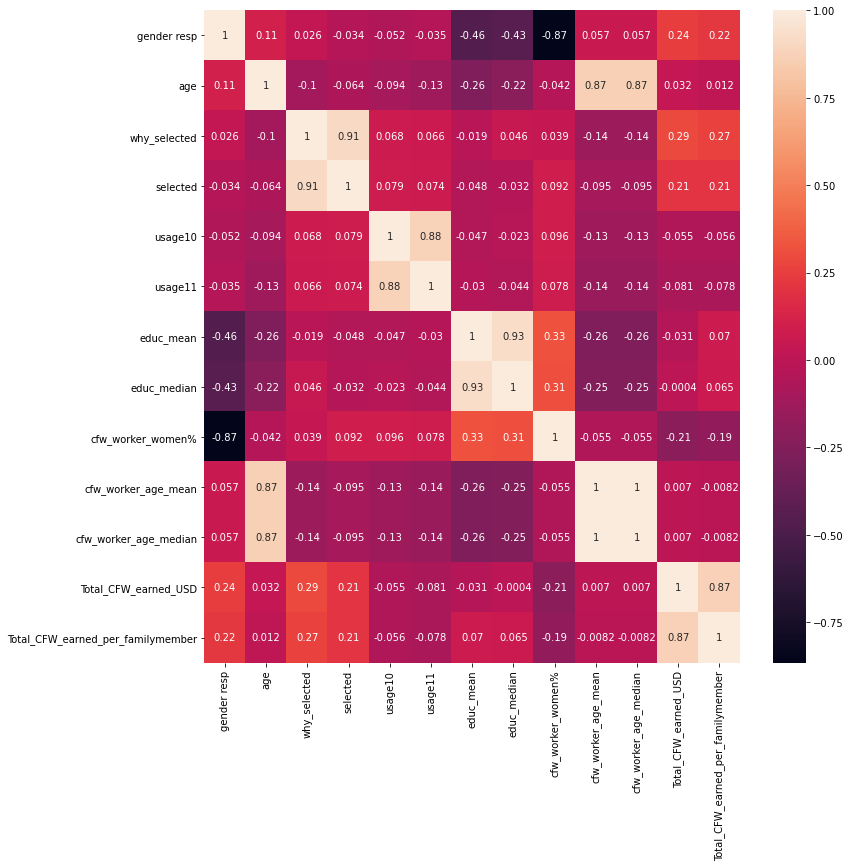

In [139]:
variables=[]
for i in df.columns.tolist():
    a=0
    for j in df.columns.tolist():
        if a==1:
            continue
        elif i!=j:
            if abs(st.pearsonr(df[i],df[j])[0])>0.8:
                variables.append(i)
                a=1

corr2=pd.DataFrame(index=variables)
for i in variables:
    L=[]
    for j in variables:
        L.append(st.pearsonr(df[i],df[j])[0])
    corr2[i]=np.array(L)
plt.figure(figsize=(12,12))
sn.heatmap(corr2, annot=True)
plt.show()

In [140]:
data['Village_clean'].unique()

array(['Hadah', 'Al-Samoud neighborhood alone, the martyr Badr',
       'Alqatie', 'Bayt bus', "Sanea' alqadimuh", 'Aljamie',
       'Hayu aleumaal', "Anma'", 'Other_drop'], dtype=object)

In [141]:
df.drop(['educ_mean','cfw_worker_age_median'],axis=1,inplace=True)

In [142]:
df.drop('selected',axis=1,inplace=True)

In [143]:
########################### On en est là ##############################################

In [144]:
df.shape

(103, 104)

# Extraction des corrélations

In [145]:
binaire=[i for i in df.columns if len(df[i].unique())==2 and set(df[i].unique()).issubset(set([0,1]))]
len(binaire)

50

In [146]:
df.columns

Index(['gender resp', 'age', 'Head_Household', 'adults_num', 'children_num',
       'children1_num', 'totalhhcompo', 'leave', 'cfw_worker_num',
       'cashspend_num',
       ...
       'use1_Rice', 'use1_Wheat flour',
       'Village_clean_Al-Samoud neighborhood alone, the martyr Badr',
       'Village_clean_Aljamie', 'Village_clean_Alqatie', 'Village_clean_Anma'',
       'Village_clean_Bayt bus', 'Village_clean_Hadah',
       'Village_clean_Hayu aleumaal', 'Village_clean_Sanea' alqadimuh'],
      dtype='object', length=104)

In [147]:
question[-question['parent'].isna()]

,parent,type,Treatment,Other,question
Idquest,parent,type,Treatment,Other,NaN


In [148]:
parent=question['parent'].dropna()
parent

Idquest    parent
Name: parent, dtype: object

In [149]:
'dry oct' in parent

False

In [150]:
parenting=[i for i in df.columns if '_'.join(i.split('_')[:-1]) in parent.index or i in parent.index]
parenting

[]

In [151]:
df[[i for i in df if df[i].isna().sum()>0]]

""
UniqueID
4
5
6
7
8
...
103
104
105


In [159]:
correl={}
for i in df.columns:
    #On sélectionne le bon modèle
    if i in binaire:
        gbr=GradientBoostingClassifier()
    else:
        gbr=GradientBoostingRegressor()
    
    if i in parent:
        dfm=df[df[parent[i]]==1].copy()
        y=dfm[i]
        X=dfm.drop([i],axis=1).copy()
    else:    
        y=df[i]
        X=df.drop([i],axis=1).copy()
    
    gbr.fit(X,y)
    
    correl[i]=pd.DataFrame(gbr.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).iloc[:20].index.tolist()
    print(i,correl[i])

gender resp ['cfw_worker_women%', 'femalecontrib%', 'cashspend_Women%', 'cashspend_age_ponderated', 'children_num', "Village_clean_Anma'", 'cfw_worker_num', 'usage4', 'cfw_worker_HH%', 'use1_Not form above', 'cfw_worker_age_mean', 'increased_exp Not form above', 'adults_num', 'usage2', 'increased_exp Wheat flour', 'age HHH', 'cashspend_HH_member_%', 'Village_clean_Hadah', 'totalhhcompo', 'use1_Wheat flour']
age ['cfw_worker_age_mean', 'usage5', 'cashspend_age_ponderated', 'age_median', "Village_clean_Anma'", 'usage7', 'usage10', 'age HHH', 'male%', 'usage3', 'usage17', 'Head_Household', 'cashspend_HH_member_%', 'usage2', 'usage9', 'age_mean', 'Village_clean_Hadah', 'contrib%', 'cfw_worker_HH%', 'usage11']
Head_Household ['age', 'age HHH', 'gender resp', 'contrib_tot', 'gender HHH', 'cfw_worker_women%', 'femalecontrib%', 'contrib%', 'level_effort', 'Total_CFW_earned_per_familymember', 'Total_CFW_earned_USD', 'usage21', 'cashspend_HH_member_%', 'cashspend_age_ponderated', 'adults_num', '

usage9 ['Village_clean_Hayu aleumaal', 'usage2', 'usage14', 'usage11', 'usage10', 'increased_exp Fish', 'Total_CFW_earned_USD', 'usage21', 'increased_exp Not form above', 'usage16', 'usage5', 'age', 'gender resp', 'usage7', 'usage6', 'usage15', 'Total_CFW_earned_per_familymember', 'usage18', 'usage23', 'effect_lasted']
usage10 ['usage11', 'usage2', 'cfw_worker_age_mean', 'diffcult_months January', 'diffcult_months November', 'amt', 'age', 'usage9', 'usage15', 'educ_median', 'age HHH', 'ablegenerate_income', 'usage4', 'diffcult_months July', 'usage5', 'femalecontrib%', 'cashspend_age_ponderated', 'diffcult_months June', 'Total_CFW_earned_USD', 'Total_CFW_earned_per_familymember']
usage11 ['usage10', 'usage9', 'Total_CFW_earned_per_familymember', 'usage5', 'increased_exp Sugar', 'age_median', 'femalecontrib%', 'diffcult_months September', 'age HHH', 'age_mean', 'usage4', 'Total_CFW_earned_USD', 'project_lasted', 'increased_exp Fish', 'usage15', 'increased_exp Qhat', 'investment', 'usage1

increased_exp Meat ['usage8', 'project_lasted', 'Village_clean_Hayu aleumaal', 'Village_clean_Aljamie', 'usage7', 'usage13', 'Village_clean_Bayt bus', 'contrib%', 'cfw_worker_HH%', 'usage19', 'male%', 'Total_CFW_earned_per_familymember', 'usage17', 'adults_num', 'educ_median', 'effect_lasted', 'usage9', 'cfw_worker_num', 'usage4', 'usage2']
increased_exp Fish ['usage9', 'usage8', 'project_lasted', 'Total_CFW_earned_USD', 'usage22', 'Village_clean_Al-Samoud neighborhood alone, the martyr Badr', 'usage23', 'increased_exp Qhat', 'Total_CFW_earned_per_familymember', 'diffcult_months December', 'usage5', 'usage24', 'increased_exp Meat', 'use1_Not form above', 'investment', 'usage12', 'usage17', 'diffcult_months November', 'usage2', 'salary_corect']
increased_exp Fruits ['usage9', 'usage14', 'usage21', 'usage5', 'effect_lasted', 'educ_median', 'usage10', 'Total_CFW_earned_per_familymember', 'Total_CFW_earned_USD', 'male%', 'contrib%', 'usage4', 'age HHH', 'investment', 'usage13', 'usage2', '

more_work ['cfw_worker_age_mean', 'age', 'male%', 'usage7', 'Total_CFW_earned_per_familymember', 'usage2', 'usage19', 'usage5', 'usage16', 'totalhhcompo', 'contrib_tot', 'use1_Not form above', 'increased_exp Milk', 'diffcult_months March', 'age_mean', 'cashspend_Women%', 'project_lasted', 'usage4', 'usage8', "Village_clean_Anma'"]
male% ['contrib%', 'femalecontrib%', 'usage5', 'gender resp', 'Total_CFW_earned_USD', 'usage19', 'age HHH', 'contrib_tot', 'usage4', 'Head_Household', 'Village_clean_Al-Samoud neighborhood alone, the martyr Badr', 'usage15', 'usage10', 'age_median', 'children1_num', 'cashspend_HH_member_%', 'age', 'use1_Wheat flour', 'usage9', 'adults_num']
age_mean ['age_median', 'cashspend_age_ponderated', 'adults_num', 'age HHH', 'children1_num', 'cfw_worker_age_mean', 'educ_median', 'male%', 'usage23', 'Total_CFW_earned_USD', 'contrib%', 'diffcult_months January', 'usage16', 'totalhhcompo', 'cfw_worker_HH%', 'usage22', 'project_lasted', 'usage26', 'amt', 'cashspend_HH_mem

Village_clean_Anma' ['cfw_worker_HH%', 'cfw_worker_num', 'usage23', 'cashspend_Women%', 'usage5', 'Village_clean_Hadah', 'age_median', 'leave', 'contrib%', 'increased_exp Qhat', 'increased_exp Not form above', 'effect_lasted', 'male%', 'age_mean', 'age', 'educ_median', 'project_lasted', 'femalecontrib%', 'adults_num', 'increased_exp Health']
Village_clean_Bayt bus ['usage8', 'usage12', 'Total_CFW_earned_USD', 'Total_CFW_earned_per_familymember', 'effect_lasted', 'children1_num', 'investment', 'usage2', 'usage3', 'usage13', 'usage21', 'usage10', 'Village_clean_Alqatie', 'age_mean', 'usage7', 'usage5', 'usage15', 'age_median', 'increased_exp Qhat', 'educ_highest']
Village_clean_Hadah ['usage5', 'Total_CFW_earned_per_familymember', 'increased_exp Wheat flour', 'effect_lasted', "Village_clean_Anma'", 'contrib%', 'usage2', 'ablegenerate_income', 'leave', 'gender_supervisor', 'diffcult_months May', 'cfw_worker_age_mean', 'cashspend_age_ponderated', 'cashspend_num', 'contrib_tot', 'increased_

In [153]:
pd.DataFrame(gbr.feature_importances_,index=X.columns).sort_values(by=0,ascending=False).head(20)

,0
cfw_worker_women%,4.198669e-01
Total_CFW_earned_USD,3.797714e-01
Village_clean_Aljamie,4.450122e-02
cashspend_age_ponderated,4.302226e-02
salary_decided,3.154459e-02
contrib%,2.839435e-02
Total_CFW_earned_per_familymember,2.729879e-02
usage11,8.276600e-03
usage10,5.169926e-03
increased_exp Water,5.096031e-03


In [154]:
categorical

['increased_exp Sorghum',
 'increased_exp Wheat flour',
 'increased_exp Maize',
 'increased_exp Sugar',
 'increased_exp Veg Oil',
 'increased_exp Milk',
 'increased_exp Rice',
 'increased_exp Meat',
 'increased_exp Fish',
 'increased_exp Tea leaves',
 'increased_exp Salt',
 'increased_exp Cow pea',
 'increased_exp Pasta',
 'increased_exp Fruits',
 'increased_exp Soap',
 'increased_exp Water',
 'increased_exp Health',
 'increased_exp Clothes',
 'increased_exp School - Madrassa',
 'increased_exp School - Formal',
 'increased_exp Kerozene',
 'increased_exp Firewood',
 'increased_exp Qhat',
 'increased_exp Tools',
 'increased_exp Books',
 'increased_exp Education',
 'increased_exp Not form above',
 'diffcult_months January',
 'diffcult_months February',
 'diffcult_months March',
 'diffcult_months April',
 'diffcult_months May',
 'diffcult_months June',
 'diffcult_months July',
 'diffcult_months August',
 'diffcult_months September',
 'diffcult_months October',
 'diffcult_months November',


In [155]:
cat_cols=['diffcult_months ','increased_exp ']
cat_cols

['diffcult_months ', 'increased_exp ']

In [156]:
for i in cat_cols:
    print('####################',i,'####################')
    print([k for k in df.columns if i in k])

#################### diffcult_months  ####################
['diffcult_months January', 'diffcult_months February', 'diffcult_months March', 'diffcult_months April', 'diffcult_months May', 'diffcult_months June', 'diffcult_months July', 'diffcult_months August', 'diffcult_months September', 'diffcult_months October', 'diffcult_months November', 'diffcult_months December']
#################### increased_exp  ####################
['increased_exp Wheat flour', 'increased_exp Sugar', 'increased_exp Veg Oil', 'increased_exp Milk', 'increased_exp Rice', 'increased_exp Meat', 'increased_exp Fish', 'increased_exp Fruits', 'increased_exp Water', 'increased_exp Health', 'increased_exp Clothes', 'increased_exp Qhat', 'increased_exp Education', 'increased_exp Not form above']


In [157]:
for i in correl:
    for k in range(10):
        for feat in dummy+cat_cols:
            if feat in correl[i][k]:
                correl[i][k]=feat

In [329]:
#fusionnage des variables catégorielles des données des questions principales
#1/ je rassemble les données en une seule catégorie de donnée de cat_cols
for j in dummy+cat_cols:
    correl[j]=[]
    for i in correl:
        if i!=j and j in i:
            correl[j]+=correl[i]

In [330]:
finalkey=dummy+cat_cols
for i in correl:
    a=False
    for k in dummy+cat_cols:
        if k in i:
            a=True
    if not a:
        finalkey.append(i)
            

correl_final={i:correl[i] for i in finalkey}
print(len(correl_final))

70


In [331]:
from collections import Counter
for i in correl_final:
    print(i,len([k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i]))

use1 28
Village_clean 47
diffcult_months  48
increased_exp  51
gender resp 8
age 10
Head_Household 10
adults_num 10
children_num 10
children1_num 10
totalhhcompo 9
leave 9
cfw_worker_num 10
cashspend_num 10
why_selected 10
fairselection 10
level_effort 10
gender_supervisor 9
salary_corect 10
salary_decided 10
usage1 9
usage2 10
usage3 10
usage4 10
usage5 10
usage6 10
usage7 10
usage8 9
usage9 10
usage10 10
usage11 9
usage12 10
usage13 7
usage14 10
usage15 10
usage16 10
usage17 9
usage18 10
usage19 9
usage20 10
usage21 10
usage22 10
usage23 8
usage24 10
usage25 10
usage26 10
project_lasted 9
effect_lasted 10
investment 10
ablegenerate_income 10
amt 10
more_work 10
male% 10
age_mean 10
age_median 10
educ_highest 10
educ_median 10
contrib% 9
contrib_tot 10
femalecontrib% 10
age HHH 9
gender HHH 10
cfw_worker_HH% 10
cfw_worker_women% 10
cfw_worker_age_mean 10
cashspend_HH_member_% 10
cashspend_Women% 10
cashspend_age_ponderated 10
Total_CFW_earned_USD 10
Total_CFW_earned_per_familymember 1

In [332]:
cat_cols

['diffcult_months ', 'increased_exp ']

In [333]:
for i in correl_final:
    correl_final[i]=[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i]

In [334]:
for i in correl_final:
    correl_final[i]=[k[0] for k in Counter(correl_final[i]).most_common() if k[0]!=i][:10]
    if len(correl_final[i])<10:
        print(i,correl_final[i])

gender resp ['Village_clean', 'use1', 'cfw_worker_women%', 'femalecontrib%', 'cashspend_Women%', 'children_num', 'usage4', 'usage2']
totalhhcompo ['diffcult_months ', 'adults_num', 'children_num', 'children1_num', 'investment', 'femalecontrib%', 'contrib%', 'cashspend_HH_member_%', 'project_lasted']
leave ['Village_clean', 'usage8', 'usage9', 'contrib%', 'investment', 'usage2', 'increased_exp ', 'cfw_worker_age_mean', 'usage12']
gender_supervisor ['increased_exp ', 'usage5', 'usage3', 'usage26', 'diffcult_months ', 'Total_CFW_earned_USD', 'usage4', 'Total_CFW_earned_per_familymember', 'cashspend_age_ponderated']
usage1 ['increased_exp ', 'cashspend_age_ponderated', 'usage15', 'age', 'cfw_worker_age_mean', 'age_median', 'Total_CFW_earned_USD', 'usage21', 'usage22']
usage8 ['increased_exp ', 'usage12', 'effect_lasted', 'usage9', 'investment', 'usage14', 'project_lasted', 'Total_CFW_earned_per_familymember', 'male%']
usage11 ['increased_exp ', 'usage10', 'usage9', 'usage5', 'Total_CFW_ear

In [335]:
for i in [i for i in df if 'usage' in i]:
    data[i]=data[i].fillna(0)
data['cfw_worker_women%']=data['cfw_worker_women%'].fillna(0)
data['cfw_worker_age_mean'].mean()
data['cfw_worker_age_mean']=data['cfw_worker_age_mean'].fillna(32.31)
data['cfw_worker_age_median']=data['cfw_worker_age_median'].fillna(32.31)

In [336]:

data2['cfw_worker_women%']=data['cfw_worker_women%']
data2['cfw_worker_age_mean']=data['cfw_worker_age_mean']
data2['cfw_worker_age_median']=data['cfw_worker_age_median']

In [337]:
data2['cfw_worker_age_median']

UniqueID
4      21.00
5      28.50
6      21.00
7      56.00
8      33.00
       ...  
103    30.00
104    22.00
105    32.31
106    24.00
107    23.00
Name: cfw_worker_age_median, Length: 103, dtype: float64

In [192]:
for i in [i for i in data if data2[i].isna().sum()>0]:
    data2[i]=data[i]

In [193]:
data2[[i for i in data if data2[i].isna().sum()>0]]

""
UniqueID
4
5
6
7
8
...
103
104
105


In [152]:
cat_cols

['diffcult_months ', 'increased_exp ', 'usage']

In [167]:
from scipy.stats import chi2_contingency,f_oneway
import statsmodels.api as sm
#Tests statistiques
def test_hyp(i,j):
    if i in dummy or (i in data and len(df[i].unique()))==2: #Je commence par les dummies
        
        if j in dummy:
            test=data[[i,j]].copy() #je selectionne les données
            test['ones']=np.ones(len(test))
            values=test.groupby(by=[i,j]).count().unstack().fillna(0).values #j'extrait le tableau de contingence
            return [chi2_contingency(values)[1]] #je calcule la p value
            
        elif j in cat_cols:
            test=data[[i]+[k for k in df.columns if j in k]].copy()
            values=test.groupby(by=i).aggregate({k:'sum' for k in test.columns if k!=i}).values
            return [chi2_contingency(values)[1]]
            
        else:
            print(i,j,'foneway:', f_oneway(*[data[data[i]==k][j] for k in data[i].unique()])[1])
            return [f_oneway(*[data[data[i]==k][j] for k in data[i].unique() if len(data[data[i]==k][j].to_list())>0])[1]]
            
    elif i in cat_cols:#Je passe aux catégorielles
        
        if j in dummy or (j in data and len(df[j].unique()))==2:
            test=data[[j]+[k for k in df.columns if i in k]].copy()
            values=test.groupby(by=j).aggregate({k:'sum' for k in test.columns if k!=j}).values
            return [chi2_contingency(values)[1]]  #20
            
        elif j in cat_cols:
            test=data[[n for n in data if i in n]+[n for n in data if j in n]].copy()
            L1=[n for n in data if i in n]
            #print(L1)
            L2=[n for n in data if j in n]
            #print(L2)
            test2=pd.DataFrame(columns=L1)
            for k in L2:
                if data[k].sum()!=0:
                    test2=test2.append(test[test[k]==1].sum()[L1],ignore_index=True)
            #print(test2)
            test2.drop([i for i in test2 if test2[i].sum()==0],axis=1,inplace=True)
            values=test2.values
            #print(values)
            return [chi2_contingency(values)[1]]
            
        else:
            print(i,j,'f_oneway :',f_oneway(*[data[data[k]==1][j] for k in [n for n in data if i in n]])[1])
            return [f_oneway(*[np.array(data[data[k]==1][j].to_list()) for k in [n for n in data if i in n] if len(data[data[k]==1][j].to_list())>0])[1]]
           
                
    else: #je prends les autres (les to_codes et les continues)
        if j in dummy or (j in data and len(df[j].unique()))==2:
            print(i,j,'f_oneway :',f_oneway(*[data[data[j]==k][i] for k in data[j].unique()])[1])
            return [f_oneway(*[data[data[j]==k][i] for k in data[j].unique() if len(data[data[j]==k][i].to_list())>0])[1]]
            
        elif j in cat_cols:
            print(i,j,'f_oneway :',f_oneway(*[data[data[k]==1][i] for k in [n for n in data if j in n]])[1])
            return [f_oneway(*[data[data[k]==1][i] for k in [n for n in data if j in n] if len(data[data[k]==1][i].to_list())>0])[1]]
            
        else:
            mod = sm.OLS(data[i],data[j])
            fii = mod.fit()
            return [fii.summary2().tables[1]['P>|t|'][0],fii.summary2().tables[0][1][6]] #f-stat et R2
            
            
    

In [121]:
mod = sm.OLS(data['cashspend_Women%'],data['cashspend_num'])
fii = mod.fit()

In [183]:
fii.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
===============================================================================
Model:                  OLS              Adj. R-squared (uncentered): 0.398    
Dependent Variable:     cashspend_Women% AIC:                         1048.3131
Date:                   2022-02-24 11:22 BIC:                         1050.9479
No. Observations:       103              Log-Likelihood:              -523.16  
Df Model:               1                F-statistic:                 69.09    
Df Residuals:           102              Prob (F-statistic):          4.28e-13 
R-squared (uncentered): 0.404            Scale:                       1525.8   
----------------------------------------------------------------------------------
                      Coef.     Std.Err.      t       P>|t|      [0.025     0.975]
----------------------------------------------------------------------------------
cashspend_num        19.7232      2.3728    8.3122    0.0000    15.0168    24.4297
-------------------------------------------------------------------------------
Omnibus:                  14.538            Durbin-Watson:               1.223 
Prob(Omnibus):            0.001             Jarque-Bera (JB):            17.435
Skew:                     1.004             Prob(JB):                    0.000 
Kurtosis:                 2.826             Condition No.:               1     
===============================================================================

"""

In [160]:
i='diffcult_months '
j='Total_CFW_earned_USD'

In [217]:
data[j]

UniqueID
4       150.0
5       400.0
6         7.0
7       116.0
8        82.0
        ...  
103     140.0
104     240.0
105       1.6
106    2800.0
107      10.0
Name: Total_CFW_earned_USD, Length: 103, dtype: float64

In [161]:
data[[k for k in data if i in k]]

,diffcult_months January,diffcult_months February,diffcult_months March,diffcult_months April,diffcult_months May,diffcult_months June,diffcult_months July,diffcult_months August,diffcult_months September,diffcult_months October,diffcult_months November,diffcult_months December
UniqueID,,,,,,,,,,,,
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,1,1,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,1,1
8,1,1,1,1,0,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,1,0,0,0,0,0
104,0,0,1,0,0,0,0,0,0,0,0,0
105,1,0,0,0,0,0,0,0,0,0,0,0


In [162]:
[np.array(data[data[k]==1][j].to_list()) for k in [n for n in data if i in n] if len(data[data[k]==1][j].to_list())>0]

[array([8.200e+01, 9.300e+01, 1.160e+02, 4.500e+03, 4.800e+02, 1.548e+03,
        2.856e+03, 2.000e+02, 1.410e+02, 3.600e+01, 2.520e+03, 1.200e+02,
        1.320e+02, 8.760e+02, 9.920e+03, 5.600e+01, 8.100e+01, 3.000e+02,
        2.152e-01, 6.360e+02, 1.500e+02, 2.640e+02, 9.300e+01, 1.600e+00,
        2.800e+03, 1.000e+01]),
 array([  82.,   33.,  116.,  784.,  880.,  480.,  141.,  180.,   36.,
        1152.,  120.,  120.,   56.,   81.,   32., 1240.,   10.]),
 array([ 82.,  33., 116., 480.,  36., 120.,  81., 160., 592., 240.,  10.]),
 array([4.0000e+02, 8.2000e+01, 3.3000e+01, 3.0000e+00, 1.1600e+02,
        2.2500e+02, 1.2700e+02, 4.8000e+02, 5.2800e+03, 1.2000e+02,
        3.6000e+01, 1.2000e+02, 1.7200e+03, 2.8875e+02, 1.3150e+02,
        2.7375e+02, 2.5831e+02, 7.5000e+00, 2.3600e+02, 5.6000e+01,
        8.1000e+01, 8.0000e+02, 7.5000e+00, 1.9200e+02, 1.0000e+01]),
 array([ 400.   ,    3.   ,  116.   ,   96.   ,   70.   ,    4.   ,
         225.   ,  127.   ,  200.   ,  180.   ,  

In [163]:
f_oneway(*[np.array(data[data[k]==1][j].to_list()) for k in [n for n in data if i in n] if len(data[data[k]==1][j].to_list())>0])

F_onewayResult(statistic=1.1197252371355653, pvalue=0.34732416073644584)

In [209]:
f_oneway(*[data[data[k]==1][j] for k in [n for n in data if i in n]])

/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


F_onewayResult(statistic=nan, pvalue=nan)

In [ ]:
[4.278122465333067e-13, '0.404'],

In [177]:
k=0
for i in correl_final:
    k+=len(correl_final[i])
k

369

In [175]:
display={}
for i in correl_final:
    
    display[i]={}
    for j in correl_final[i]:
        
        try: 
            if test_hyp(i,j)[0]<0.05:
                display[i][j]=test_hyp(i,j)
          
        except:
            print(i,j,test_hyp(i,j)[0])
            display[i][j]='Problem'
            print("############## PB ###############################")


use1 usage11 foneway: 0.840968295849297
use1 usage7 foneway: 7.467906329374484e-07
use1 usage7 foneway: 7.467906329374484e-07
use1 Total_CFW_earned_per_familymember foneway: 0.01825473872260029
use1 Total_CFW_earned_per_familymember foneway: 0.01825473872260029
use1 Total_CFW_earned_USD foneway: 0.052167201168154986
use1 usage9 foneway: 0.026639620319930994
use1 usage9 foneway: 0.026639620319930994
use1 cfw_worker_num foneway: 4.724650071575155e-05
use1 cfw_worker_num foneway: 4.724650071575155e-05
use1 usage14 foneway: 0.07812924755918824
use1 usage10 foneway: 0.9299804685059472
use1 age HHH foneway: 0.29684512961315557
Village_clean Total_CFW_earned_per_familymember foneway: 0.0037690042754583613
Village_clean Total_CFW_earned_per_familymember foneway: 0.0037690042754583613
Village_clean investment foneway: 2.300996746741164e-06
Village_clean investment foneway: 2.300996746741164e-06
Village_clean leave foneway: 1.608342193848296e-09
Village_clean leave foneway: 1.608342193848296e-09

/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInput

increased_exp  usage5 f_oneway : nan
increased_exp  usage5 f_oneway : nan
increased_exp  usage7 f_oneway : nan
increased_exp  usage7 f_oneway : nan
increased_exp  usage4 f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInput

increased_exp  usage16 f_oneway : nan
increased_exp  usage16 f_oneway : nan
increased_exp  usage9 f_oneway : nan
increased_exp  usage9 f_oneway : nan
increased_exp  usage11 f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


increased_exp  usage11 f_oneway : nan
increased_exp  male% f_oneway : nan
increased_exp  usage14 f_oneway : nan
gender resp cfw_worker_women% foneway: 4.2578449950594935e-32
gender resp cfw_worker_women% foneway: 4.2578449950594935e-32
gender resp cashspend_Women% foneway: 1.3863833090799606e-10
gender resp cashspend_Women% foneway: 1.3863833090799606e-10
gender resp femalecontrib% foneway: 1.1436654999993873e-13
gender resp femalecontrib% foneway: 1.1436654999993873e-13
gender resp age HHH foneway: 0.24891386445615502
gender resp cfw_worker_HH% foneway: 0.8946848617145726
gender resp usage2 foneway: 0.07070193353464704
gender resp usage4 foneway: 0.9273452125140421
age Village_clean f_oneway : 0.6316415143003598
Head_Household age foneway: 7.621229813179174e-05
Head_Household age foneway: 7.621229813179174e-05
Head_Household age HHH foneway: 9.826467014855968e-09
Head_Household age HHH foneway: 9.826467014855968e-09
Head_Household gender resp foneway: 3.1233995839700848e-09
Head_House

/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage2 increased_exp  f_oneway : nan
usage2 increased_exp  f_oneway : nan
usage4 use1 f_oneway : 0.0002006298839668722
usage4 use1 f_oneway : 0.0002006298839668722
usage4 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage5 Village_clean f_oneway : 0.00017882738920603887
usage5 Village_clean f_oneway : 0.00017882738920603887
usage5 increased_exp  f_oneway : nan
usage5 increased_exp  f_oneway : nan
usage5 use1 f_oneway : 0.277321397093212


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage6 Village_clean f_oneway : 0.011287744371005323
usage6 Village_clean f_oneway : 0.011287744371005323
usage6 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage7 use1 f_oneway : 7.467906329374484e-07
usage7 use1 f_oneway : 7.467906329374484e-07
usage7 increased_exp  f_oneway : nan
usage7 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage8 increased_exp  f_oneway : nan
usage8 increased_exp  f_oneway : nan
usage9 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage9 increased_exp  f_oneway : nan
usage9 Village_clean f_oneway : 1.610152451044305e-16
usage9 Village_clean f_oneway : 1.610152451044305e-16


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage10 increased_exp  f_oneway : nan
usage10 why_selected f_oneway : 0.4979040680451974
usage10 diffcult_months  f_oneway : 0.9999949942107477
usage11 increased_exp  f_oneway : nan
usage11 increased_exp  f_oneway : nan
usage11 gender resp f_oneway : 0.7258743208302165
usage12 Village_clean f_oneway : 2.9903991362732405e-08
usage12 Village_clean f_oneway : 2.9903991362732405e-08
usage13 diffcult_months  f_oneway : 0.9999768056726761
usage13 increased_exp  f_oneway : nan
usage13 why_selected f_oneway : 0.41267482935480393
usage14 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage14 use1 f_oneway : 0.07812924755918824


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage16 increased_exp  f_oneway : nan
usage16 increased_exp  f_oneway : nan
usage16 diffcult_months  f_oneway : 0.5430180434122172
usage16 Village_clean f_oneway : 0.00010620529099399099
usage16 Village_clean f_oneway : 0.00010620529099399099


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage17 increased_exp  f_oneway : nan
usage17 increased_exp  f_oneway : nan
usage17 more_work f_oneway : 0.04304951545983903
usage17 more_work f_oneway : 0.04304951545983903
usage18 Village_clean f_oneway : 0.0513959652214296
usage18 increased_exp  f_oneway : nan
usage19 diffcult_months  f_oneway : 0.9999988615624397


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage20 use1 f_oneway : 0.6011428458685911
usage20 ablegenerate_income f_oneway : 0.030204997215740957
usage20 ablegenerate_income f_oneway : 0.030204997215740957
usage21 Village_clean f_oneway : 7.770592051392473e-09
usage21 Village_clean f_oneway : 7.770592051392473e-09
usage21 diffcult_months  f_oneway : 0.9549496810862825
usage22 leave f_oneway : 0.07572124479284292
usage22 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage23 increased_exp  f_oneway : nan
usage23 diffcult_months  f_oneway : 0.7013431742965238
usage23 use1 f_oneway : 7.487146431421182e-14
usage23 use1 f_oneway : 7.487146431421182e-14


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage24 increased_exp  f_oneway : nan
usage24 increased_exp  f_oneway : nan
usage24 level_effort f_oneway : 0.6848682322418433
usage25 diffcult_months  f_oneway : 0.30445343321019885
usage25 increased_exp  f_oneway : nan
usage25 increased_exp  f_oneway : nan
usage26 increased_exp  f_oneway : nan
usage26 increased_exp  f_oneway : nan


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '
/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


usage26 gender resp f_oneway : 0.02878243266250305
usage26 gender resp f_oneway : 0.02878243266250305
usage26 Village_clean f_oneway : 0.11306001346681492
usage26 gender_supervisor f_oneway : 0.05131419362354827
project_lasted Village_clean f_oneway : 4.665419688177921e-07
project_lasted Village_clean f_oneway : 4.665419688177921e-07
effect_lasted Village_clean f_oneway : 0.00035590634782481975
effect_lasted Village_clean f_oneway : 0.00035590634782481975
investment Village_clean f_oneway : 2.300996746741164e-06
investment Village_clean f_oneway : 2.300996746741164e-06
ablegenerate_income amt foneway: 2.7586371146243836e-12
ablegenerate_income amt foneway: 2.7586371146243836e-12
ablegenerate_income investment foneway: 0.0033959526187706873
ablegenerate_income investment foneway: 0.0033959526187706873
ablegenerate_income usage7 foneway: 0.9926310037673935
ablegenerate_income usage2 foneway: 0.014794965778025363
ablegenerate_income usage2 foneway: 0.014794965778025363
ablegenerate_income

/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


amt Village_clean f_oneway : 0.25038163808378017
more_work cfw_worker_age_mean foneway: 0.006472387857907894
more_work cfw_worker_age_mean foneway: 0.006472387857907894
more_work age foneway: 0.02780646773967574
more_work age foneway: 0.02780646773967574
more_work male% foneway: 0.44795026446211195
more_work usage7 foneway: 0.0169281026428469
more_work usage7 foneway: 0.0169281026428469
more_work usage2 foneway: 0.40433464932939966
more_work Total_CFW_earned_USD foneway: 0.2983258113759014
more_work contrib_tot foneway: 0.2037126637163985
more_work usage19 foneway: 0.003693435912923361
more_work usage19 foneway: 0.003693435912923361
more_work usage5 foneway: 0.29564654917972016
more_work Total_CFW_earned_per_familymember foneway: 0.32391710769286175
male% gender resp f_oneway : 0.00010442650366135815
male% gender resp f_oneway : 0.00010442650366135815
male% Head_Household f_oneway : 0.13965872037642318


/home/samuel/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


contrib% increased_exp  f_oneway : nan
contrib% gender HHH f_oneway : 5.56488609382811e-05
contrib% gender HHH f_oneway : 5.56488609382811e-05
femalecontrib% gender resp f_oneway : 1.1436654999993873e-13
femalecontrib% gender resp f_oneway : 1.1436654999993873e-13
femalecontrib% gender HHH f_oneway : 1.4261240677858996e-13
femalecontrib% gender HHH f_oneway : 1.4261240677858996e-13
femalecontrib% Head_Household f_oneway : 0.016517640229545532
femalecontrib% Head_Household f_oneway : 0.016517640229545532
femalecontrib% Village_clean f_oneway : 4.5915442095310056e-10
femalecontrib% Village_clean f_oneway : 4.5915442095310056e-10
age HHH Village_clean f_oneway : 0.018460686715386625
age HHH Village_clean f_oneway : 0.018460686715386625
age HHH Head_Household f_oneway : 9.826467014855968e-09
age HHH Head_Household f_oneway : 9.826467014855968e-09
gender HHH femalecontrib% foneway: 1.4261240677858996e-13
gender HHH femalecontrib% foneway: 1.4261240677858996e-13
gender HHH cashspend_age_pond

In [169]:
display

{'use1': {'usage7': 7.467906329374484e-07,
  'Village_clean': 2.2738052100484478e-10,
  'Total_CFW_earned_per_familymember': 0.01825473872260029,
  'usage9': 0.026639620319930994,
  'cfw_worker_num': 4.724650071575155e-05},
 'Village_clean': {'Total_CFW_earned_per_familymember': 0.0037690042754583613,
  'increased_exp ': 2.9662095718481464e-22,
  'investment': 2.300996746741164e-06,
  'leave': 1.608342193848296e-09,
  'usage5': 0.00017882738920603887,
  'usage6': 0.011287744371005323,
  'usage7': 0.014413549666036413,
  'usage8': 4.863447100116415e-08},
 'diffcult_months ': {},
 'increased_exp ': {'Village_clean': 2.9662095718481464e-22,
  'usage5': 0.0005459677531216555,
  'usage7': 0.041611251903358515,
  'usage16': 4.337605891792035e-19,
  'usage9': 4.770201818428832e-05,
  'usage11': 0.04401237818721453},
 'gender resp': {'increased_exp ': 0.004090218746879587,
  'cfw_worker_women%': 4.2578449950594935e-32,
  'cashspend_Women%': 1.3863833090799606e-10,
  'femalecontrib%': 1.1436654

In [170]:
k=0
for i in display:
    k+=len(display[i])
k

478

In [124]:
i='diffcult_months '
j='Total_CFW_earned_USD'

In [167]:
test

,diffcult_months January,diffcult_months February,diffcult_months March,diffcult_months April,diffcult_months May,diffcult_months June,diffcult_months July,diffcult_months August,diffcult_months September,diffcult_months October,...,usage17,usage18,usage19,usage20,usage21,usage22,usage23,usage24,usage25,usage26
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,0,0,0,0,0,1,0,0,0,0,...,0.000000,55.704698,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0,0,0,1,1,0,0,0,0,0,...,50.505051,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
6,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
7,0,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
8,1,1,1,1,0,0,1,1,1,1,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,47.560976,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0,0,0,0,0,0,1,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,42.857143,0.000000,0.0,0.0
104,0,0,1,0,0,0,0,0,0,0,...,0.000000,0.000000,0.0,0.0,0.000000,0.000000,16.666667,0.000000,0.0,0.0
105,1,0,0,0,0,0,0,0,0,0,...,33.707865,4.494382,0.0,0.0,0.000000,13.483146,10.112360,4.494382,0.0,0.0


In [179]:
test=data[[n for n in data if i in n]+[n for n in data if j in n]].copy()
L1=[n for n in data if i in n]
L2=[n for n in data if j in n]
test2=pd.DataFrame(columns=L1)
for k in L2:
    if data[k].sum()!=0:
        test2=test2.append(test[test[k]==1].sum()[L1],ignore_index=True)
test2.drop([i for i in test2 if test2[i].sum()==0],axis=1,inplace=True)
values=test2.values
[chi2_contingency(values)[1]]

[1.0]

In [226]:
display

{'use1': {'usage': 'u',
  'Total_CFW_earned_per_familymember': 0.01825473872260029,
  'Total_CFW_earned_USD': 0.052167201168154986,
  'Village_clean': 2.2738052100484478e-10,
  'cfw_worker_num': 4.724650071575155e-05,
  'age HHH': 0.29684512961315557,
  'cfw_worker_HH%': 0.058063162721881695,
  'cashspend_Women%': 0.19172184248440646,
  'cfw_worker_age_mean': 0.3862818453481292,
  'totalhhcompo': 0.009517134324498116},
 'Village_clean': {'usage': 'u',
  'Total_CFW_earned_per_familymember': 0.0037690042754583613,
  'increased_exp ': 2.9662095718481464e-22,
  'investment': 2.300996746741164e-06,
  'cfw_worker_age_mean': 0.6161408051581794,
  'diffcult_months ': 0.2766842373852512,
  'Total_CFW_earned_USD': 0.0032917747639417297,
  'leave': 1.608342193848296e-09,
  'amt': 0.25038163808378017,
  'effect_lasted': 0.00035590634782481975},
 'diffcult_months ': {'usage': 'u',
  'investment': F_onewayResult(statistic=0.8021590863900072, pvalue=0.6378433096679488),
  'Village_clean': 0.276684237

In [139]:
fii.summary2().tables[1]['P>|t|'][0]

NameError: name 'fii' is not defined

In [141]:
cont

NameError: name 'cont' is not defined

In [205]:
test=data[[n for n in data if i in n]+[n for n in data if j in n]].copy()
L1=[n for n in data if i in n]
L2=[n for n in data if j in n]
test2=pd.DataFrame(columns=L1)
    for k in L2:
        if data[k].sum()!=0:
test2=test2.append(test[test[k]==1].sum()[L1],ignore_index=True)
test2.drop([i for i in test2 if test2[i].sum()==0],axis=1,inplace=True)
values=test2.values

ValueError: The internally computed table of expected frequencies has a zero element at (0, 7).

In [173]:
display['diffcult_months ']

{}

In [188]:
for i in display:
    for j in display[i]:
        if i in cont_feat and j in cont_feat:
            print(i,j)

age cfw_worker_age_mean
age cashspend_age_ponderated
age age HHH
age male%
age age_median
adults_num cfw_worker_HH%
adults_num totalhhcompo
adults_num contrib_tot
adults_num cashspend_HH_member_%
adults_num contrib%
adults_num Total_CFW_earned_per_familymember
adults_num age
adults_num age_median
children_num totalhhcompo
children_num adults_num
children_num cfw_worker_HH%
children_num age
children_num effect_lasted
children_num femalecontrib%
children_num Total_CFW_earned_USD
children1_num totalhhcompo
children1_num cfw_worker_HH%
children1_num age_mean
children1_num age_median
children1_num cashspend_HH_member_%
children1_num age HHH
totalhhcompo adults_num
totalhhcompo children_num
totalhhcompo children1_num
totalhhcompo femalecontrib%
totalhhcompo contrib%
totalhhcompo cashspend_HH_member_%
totalhhcompo investment
totalhhcompo project_lasted
project_lasted investment
project_lasted Total_CFW_earned_USD
project_lasted effect_lasted
effect_lasted project_lasted
effect_lasted Total_CF

In [179]:
correl_final

{'income_source': ['income_source',
  'toilet',
  'employment',
  'clan',
  'peoplepertoil',
  'age',
  'D1Mainsourcewaterdry',
  'income',
  'village',
  'Literper member',
  'income_source',
  'income',
  'clan',
  'B1_own_land',
  'whashhandhow',
  'B1_AcresOwned',
  'Literper member',
  'D1Mainsourcewaterdry',
  'employment',
  'village'],
 'D1Mainsourcewaterdry': ['D1Mainsourcewaterrainy',
  'D1Mainsourcewaterdry',
  'D1Mainsourcewaterdry',
  'D1Mainsourcewaterdry',
  'D1Mainsourcewaterdry',
  'peoplepertoil',
  'type_benef',
  'income',
  'fresh_food_voucher',
  'B19 ',
  'timewaterrainy',
  'D1Mainsourcewaterdry',
  'village',
  'incomepermember',
  'peoplepertoil',
  'age HHH',
  'fresh_food_voucher',
  'involved_selection_process',
  'literperday',
  'WaterTreatKit',
  'peoplepertoil',
  'D1Mainsourcewaterdry',
  'B1_AcresOwned',
  'training_covid',
  'D19 ',
  'village',
  'D1Mainsourcewaterrainy',
  'village',
  'D1Mainsourcewaterrainy',
  'clan',
  'D1Mainsourcewaterrainy',

In [178]:
display

{'income_source': {'village': [7.14605209171201e-06],
  'type_benef': [1.1603130885333472e-06],
  'residency': [4.871369972415995e-05]},
 'D1Mainsourcewaterdry': {'incomepermember': [2.759633812693109e-09],
  'timewaterrainy': [7.380987184216563e-17],
  'peoplepertoil': [2.9992298661510818e-12],
  'Literper member': [0.015171766069461454],
  'D19 ': [9.536652900506173e-05]},
 'D1Mainsourcewaterrainy': {'income': [5.4270501852439854e-06],
  'D19 ': [6.363891182649918e-06],
  'village': [1.1885831472543485e-17],
  'incomepermember': [1.5891094333673398e-05],
  'A15 ': [7.249671863788684e-06],
  'peoplepertoil': [2.4046511660000065e-08],
  'Literper member': [0.0049853318119078465],
  'timewaterdry': [7.580615150236097e-07],
  'involved_selection_process': [9.18118212346452e-08],
  'B3what ': [1.1316302639282585e-05]}}

In [93]:
correl_final.pop('dry ')

[]

In [155]:
to_code

['gender resp',
 'marital',
 'residency',
 'employment',
 'washhandswhy',
 'whashhandhow',
 'type_benef']

In [94]:
correl_final

{'income_source': ['employment',
  'clan',
  'D1Mainsourcewaterdry',
  'income',
  'village',
  'Literper member'],
 'D1Mainsourcewaterdry': ['D1Mainsourcewaterrainy',
  'village',
  'peoplepertoil',
  'income',
  'type_benef',
  'fresh_food_voucher'],
 'D1Mainsourcewaterrainy': ['D1Mainsourcewaterdry',
  'D19 ',
  'village',
  'B1_AcresOwned',
  'timewaterrainy',
  'B3what '],
 'toilet': ['peoplepertoil',
  'village',
  'literperday',
  'involved_selection_process',
  'A15 ',
  'B1_AcresOwned'],
 'village': ['timewaterrainy',
  'D19 ',
  'B1_AcresOwned',
  'Literper member',
  'incomepermember',
  'toilet'],
 'clan': ['village',
  'HH men',
  'incomepermember',
  'timewaterdry',
  'peoplepertoil',
  'D19 '],
 'D19 ': ['village',
  'B1_AcresOwned',
  'peoplepertoil',
  'Literper member',
  'income',
  'timewaterdry'],
 'A15 ': ['village',
  'B19 ',
  'age HHH',
  'income',
  'type_benef',
  'B1_AcresOwned'],
 'B19 ': ['incomepermember',
  'village',
  'peoplepertoil',
  'D1Mainsourcewa

In [189]:
for i in data.columns:
    if i not in data2.columns:
        data2[i]=data[i]

In [96]:
new=[
 'HH Total',
 'incomepermember',
 'Literper member',
 ]
for i in new:
    data2[i]=data[i]

In [206]:

data2.to_csv('./DashBoard/viz.csv',sep='\t',index=None)

In [98]:
[i for i in data2 if data2[i].isna().sum()>0]

['Unnamed: 5',
 'B3what Cowpea',
 'B3what Sorghum',
 'B3what Melons',
 'B3what Maize',
 'B3what Cabbage',
 'B3what Tomatoes',
 'Unnamed: 129',
 'Unnamed: 130',
 'Unnamed: 131',
 'Unnamed: 132',
 'Unnamed: 133',
 'Unnamed: 134',
 'Unnamed: 135',
 'Unnamed: 136',
 'Unnamed: 137',
 'Unnamed: 138',
 'Unnamed: 139',
 'Unnamed: 146',
 'Unnamed: 147',
 'Unnamed: 148',
 'Unnamed: 149',
 'Unnamed: 150',
 'Unnamed: 151',
 'Unnamed: 152',
 'Unnamed: 153',
 'Unnamed: 154',
 'Unnamed: 155',
 'Unnamed: 156',
 'Unnamed: 157',
 'dry jan',
 'dry feb',
 'dry mar',
 'dry apr',
 'dry may',
 'dry jun',
 'dry jul',
 'dry aug',
 'dry sep',
 'dry oct',
 'dry nov',
 'dry dec',
 'clan']

In [153]:
import pickle

In [100]:
text

[]

In [101]:
text[-4:]

[]

In [176]:
pickle.dump( cont_feat, open( "./DashBoard/cont_feat.p", "wb" ) )
pickle.dump( dummy, open( "./DashBoard/dummy.p", "wb" ) )
pickle.dump( cat_cols, open( "./DashBoard/cat_cols.p", "wb" ) )
pickle.dump( text, open( "./DashBoard/text.p", "wb" ) )
pickle.dump( display, open( "./DashBoard/correlations.p", "wb" ) )

# Shap et LGBM

In [182]:
target=['project_lasted','effect_lasted']

In [183]:
df

,gender resp,age,Head_Household,adults_num,children_num,children1_num,totalhhcompo,leave,cfw_worker_num,cashspend_num,...,use1_Rice,use1_Wheat flour,"Village_clean_Al-Samoud neighborhood alone, the martyr Badr",Village_clean_Aljamie,Village_clean_Alqatie,Village_clean_Anma',Village_clean_Bayt bus,Village_clean_Hadah,Village_clean_Hayu aleumaal,Village_clean_Sanea' alqadimuh
UniqueID,,,,,,,,,,,,,,,,,,,,,
4,1,21,0,4,2,0,6,0,1,2,...,0,1,0,0,0,0,0,1,0,0
5,1,27,1,2,0,1,3,0,2,1,...,0,0,0,0,0,0,0,1,0,0
6,0,21,0,2,0,1,3,0,1,1,...,0,0,0,0,0,0,0,1,0,0
7,0,56,0,7,0,2,9,0,1,2,...,0,1,0,0,0,0,0,1,0,0
8,1,33,1,2,0,2,4,1,1,1,...,1,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,1,29,0,5,2,0,7,1,2,2,...,0,0,0,0,0,1,0,0,0,0
104,1,51,1,4,3,0,7,1,1,2,...,1,0,0,0,0,1,0,0,0,0
105,1,28,1,2,0,0,2,1,0,2,...,0,0,0,0,0,1,0,0,0,0


In [184]:
df.drop(target,axis=1,inplace=True)

In [185]:
import lightgbm as lgb
import shap

In [218]:
df['temoin']=np.random.standard_normal(len(df))

(array([ 2.,  1.,  5.,  3.,  5.,  6.,  7.,  3.,  8., 15., 17.,  7.,  4.,
         3.,  9.,  2.,  1.,  3.,  1.,  1.]),
 array([-2.13860441, -1.91974092, -1.70087743, -1.48201393, -1.26315044,
        -1.04428695, -0.82542346, -0.60655997, -0.38769648, -0.16883298,
         0.05003051,  0.268894  ,  0.48775749,  0.70662098,  0.92548448,
         1.14434797,  1.36321146,  1.58207495,  1.80093844,  2.01980193,
         2.23866543]),
 <BarContainer object of 20 artists>)

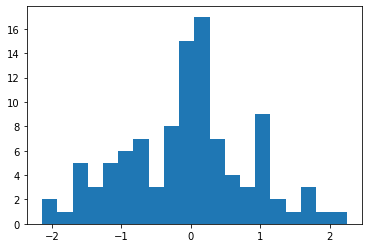

In [219]:
plt.hist(df['temoin'],bins=20)

In [342]:
lgbm1=lgb.LGBMRegressor()
lgbm2=lgb.LGBMRegressor()

In [343]:
target

['project_lasted', 'effect_lasted']

In [344]:
X1=df[[i for i in df.columns if i not in target]].copy()
y1=df['project_lasted']
X2=df[[i for i in df.columns if i not in target]].copy()
y2=df['effect_lasted']


In [345]:
lgbm1.fit(X1.values,y1)


LGBMRegressor()

In [346]:
lgbm2.fit(X2.values,y2)

LGBMRegressor()

In [347]:
explainer1 = shap.TreeExplainer(lgbm1,data = X1,feature_perturbation='interventional')

explainer2 = shap.TreeExplainer(lgbm2,data = X2,feature_perturbation='interventional')

In [348]:
svalues1=explainer1.shap_values(X1,y1)
svalues2=explainer2.shap_values(X2,y2)

In [374]:
a=X.columns.tolist()
a

['gender resp',
 'age',
 'Head_Household',
 'adults_num',
 'children_num',
 'children1_num',
 'totalhhcompo',
 'leave',
 'cfw_worker_num',
 'cashspend_num',
 'why_selected',
 'fairselection',
 'level_effort',
 'gender_supervisor',
 'salary_corect',
 'salary_decided',
 'usage1',
 'usage2',
 'usage3',
 'usage4',
 'usage5',
 'usage6',
 'usage7',
 'usage8',
 'usage9',
 'usage10',
 'usage11',
 'usage12',
 'usage13',
 'usage14',
 'usage15',
 'usage16',
 'usage17',
 'usage18',
 'usage19',
 'usage20',
 'usage21',
 'usage22',
 'usage23',
 'usage24',
 'usage25',
 'usage26',
 'project_lasted',
 'effect_lasted',
 'increased_exp Wheat flour',
 'increased_exp Sugar',
 'increased_exp Veg Oil',
 'increased_exp Milk',
 'increased_exp Rice',
 'increased_exp Meat',
 'increased_exp Fish',
 'increased_exp Fruits',
 'increased_exp Water',
 'increased_exp Health',
 'increased_exp Clothes',
 'increased_exp Qhat',
 'increased_exp Education',
 'increased_exp Not form above',
 'diffcult_months January',
 'diffcu

In [375]:
print(len(features),len(realnames))

20 20


In [203]:
for k in range(12):
    print(features[k],'#####',realnames[k])

A15 Agricultural support ##### What assistance did you receive from CEFA? [Agricultural support]
A15 Training ##### What assistance did you receive from CEFA? [Training]
persone_sick ##### Do you have a have a sick person in the household who has NOT received medical care due to money/costs?
receive_agrisupport ##### Did you receive any agricultural support from the Emergency Project by AICS?
B3what Cowpea ##### What crops did you grow on this plot? [Cowpea]
B19 Use of agricultural inputs ##### Have you received any of the following agricultural training in the last 12 months from CEFA? [Use of agricultural inputs]
timewaterdry ##### How long does it take you to and from the water source (round trip) during the DRY season?
E6_Boreholes_village ##### How many boreholes are in your village?
usedlatrinelasttime ##### Did you or any other member of your household (available) use a latrine/toilet the last time you defecated?
D1Mainsourcewaterdry_Protected dug well ##### What is your current

In [376]:
for i in range(len(a)):
    if a[i] in features:
        print(i)
        a[i]=realnames[features.index(a[i])]

15
19
21
22
25
27
29
30
31
32
33
35
36
38
49
59
68
84
85
88


In [372]:
features=['usage4','usage6','usage7','usage10','usage12','usage14','usage15','usage16','usage17','usage18','usage20',\
          'usage21','usage23','salary_decided','increased_exp Meat','cfw_worker_HH%',\
          'diffcult_months February','cashspend_Women%','cfw_worker_women%','diffcult_months November']

In [373]:
realnames=['Percentage of the cash received used for: Sugar',\
            'Percentage of the cash received used for: Milk',\
          'Percentage of the cash received used for: Rice',\
           'Percentage of the cash received used for: Tea',\
           'Percentage of the cash received used for: Cowpea',\
           'Percentage of the cash received used for: Fruits',\
           'Percentage of the cash received used for: Soap',\
           'Percentage of the cash received used for: Water',\
           'Percentage of the cash received used for: Health',\
           'Percentage of the cash received used for: Clothes',\
           'Percentage of the cash received used for: Formal School',\
           'Percentage of the cash received used for: Kerozene',\
           'Percentage of the cash received used for: Qhat',\
           'Do you know how your daily salary was decided?',\
           'The cash received allowed you to increase expenditures for: Meat',\
           'Percentage of adults from the household participating in CFW activities',\
          "What are usually the most difficult months for your household:February",\
          "Part of women in the decisions on how CFW cash is used in the household in %",\
          "Percentage of women among adults participating in CFW activities",\
          "What are usually the most difficult months for your household:November"]

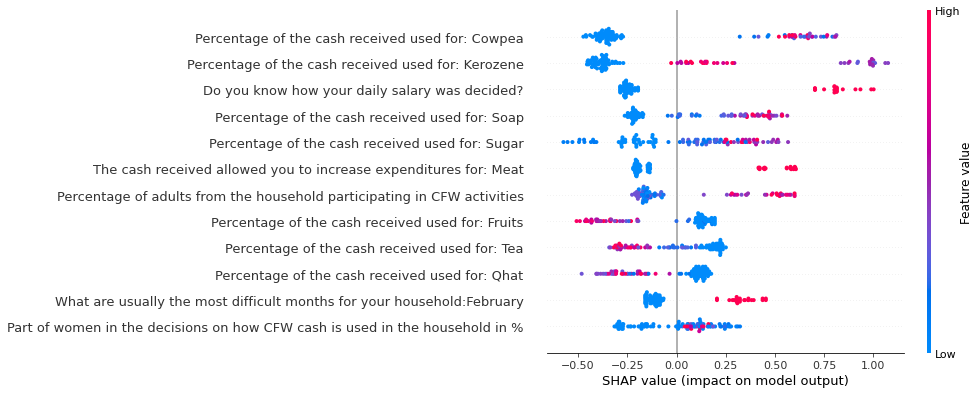

In [377]:

shap.summary_plot(svalues1,X1, feature_names=a,max_display=12)

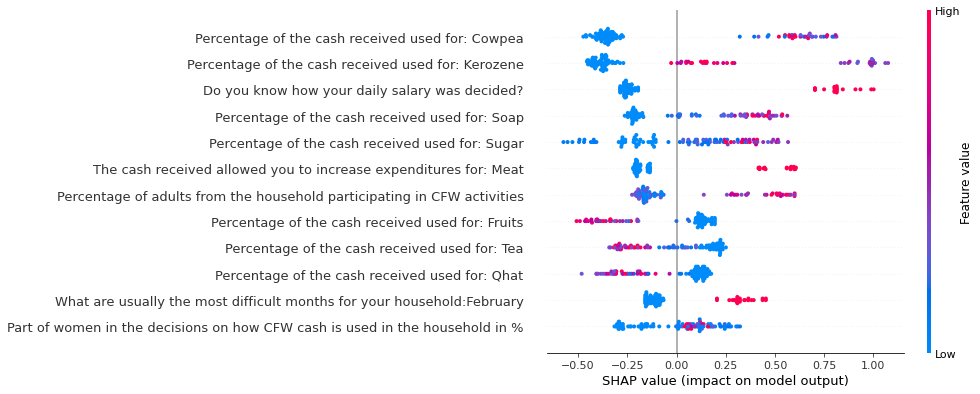

In [378]:

shap.summary_plot(svalues1,X1, feature_names=a,max_display=12)

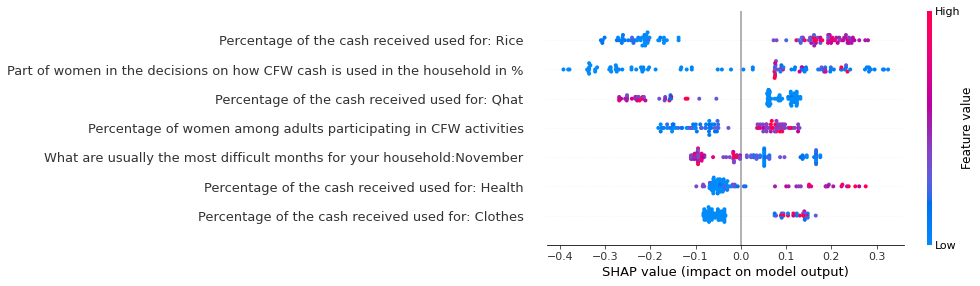

In [381]:

shap.summary_plot(svalues2,X2, feature_names=a,max_display=7)

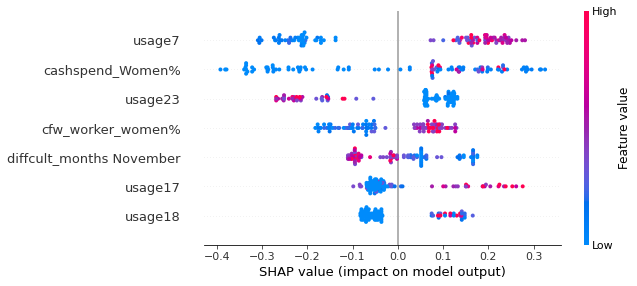

In [359]:

shap.summary_plot(svalues2,X2, feature_names=a,max_display=7)

In [125]:
a=X.columns.tolist()
a

['gender resp',
 'age',
 'Head_Household',
 'educ',
 'HH women',
 'HH girls',
 'HH men',
 'HH boys',
 'girls_school',
 'boys_school',
 'marital',
 'residency',
 'income',
 'employment',
 'A15 CFW',
 'A15 Unconditional cash transfer',
 'A15 Water supply',
 'A15 Training',
 'A15 Hygiene education',
 'A15  Improved sanitation',
 'A15 Agricultural support',
 'disabled_HH',
 'received_cash',
 'persone_sick',
 'B1_own_land',
 'B1_AcresOwned',
 'B3what Cowpea',
 'B3what Sorghum',
 'B3what Melons',
 'B3what Maize',
 'B3what Cabbage',
 'B3what Tomatoes',
 'B3what other',
 'B19 Modern agricultural practices',
 'B19 Harvesting and post-harvesting handling',
 'B19 Use of agricultural inputs',
 'B19 Fertilizer application',
 'B19 Soil erosion control',
 'B19 Seed production',
 'B19 Pest management',
 'B20_AVSI_equip',
 'C1_AVSI_CFW',
 'CFW_payment',
 'C5 Buy food',
 'C5 Pay debts',
 'C5 Buy clothes',
 'C5  Buy medicine',
 'C5 Buy water',
 'C5 Pay school fees/buy uniform and school material',
 'C5 S

In [131]:
feats=['B20_AVSI_equip', 'A15 Agricultural support','B1_AcresOwned','B3what Cowpea','A15 CFW',\
       'B3what Maize', 'B3what Tomatoes', 'use_toilet','totaldaysCFW','persone_sick']

In [132]:
real_names=['Did you receive any agricultural equipment from COOPI?',\
            'Currently, are you receiving any of the following assistance from COOPI?   [Agricultural support]',\
            'How many acres of agricultural land do all members of this household own?',\
            'What crops did you grow on this plot? [Cowpea]',\
            'Currently, are you receiving any of the following assistance from COOPI? [CFW]',\
           'What crops did you grow on this plot? [Maize]',\
           'What crops did you grow on this plot? [Tomatoes]',\
           'Did you or any other member of your household (available) use a latrine/toilet the last time you defecated?',\
           'Total days of CFW worked',\
           'Do you have a sick person in the household who has NOT received medical care due to money/costs?']

In [133]:
print(len(feats),len(real_names))

10 10


In [137]:
for i in range(10):
    print(feats[i],'####', real_names[i])

B20_AVSI_equip #### Did you receive any agricultural equipment from COOPI?
A15 Agricultural support #### Currently, are you receiving any of the following assistance from COOPI?   [Agricultural support]
B1_AcresOwned #### How many acres of agricultural land do all members of this household own?
B3what Cowpea #### What crops did you grow on this plot? [Cowpea]
A15 CFW #### Currently, are you receiving any of the following assistance from COOPI? [CFW]
B3what Maize #### What crops did you grow on this plot? [Maize]
B3what Tomatoes #### What crops did you grow on this plot? [Tomatoes]
use_toilet #### Did you or any other member of your household (available) use a latrine/toilet the last time you defecated?
totaldaysCFW #### Total days of CFW worked
persone_sick #### Do you have a sick person in the household who has NOT received medical care due to money/costs?


In [138]:
for i in range(len(a)):
    if a[i] in feats:
        a[i]=real_names[feats.index(a[i])]

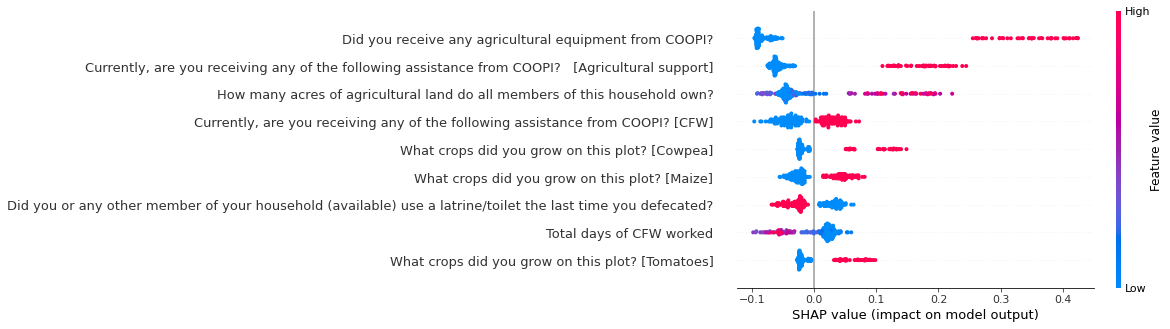

In [140]:

shap.summary_plot(svalues,X, feature_names=a,max_display=9)

In [114]:
[question[3][i] for i in feats if i in question[3]]

KeyError: 3

In [103]:
change

['change income', 'change foodsec', 'change2 LH', 'change2 food_access']

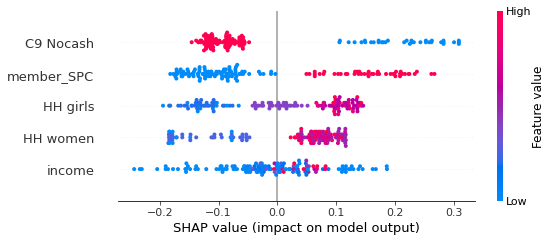

In [104]:

shap.summary_plot(svalues1,X, feature_names=a,max_display=5)

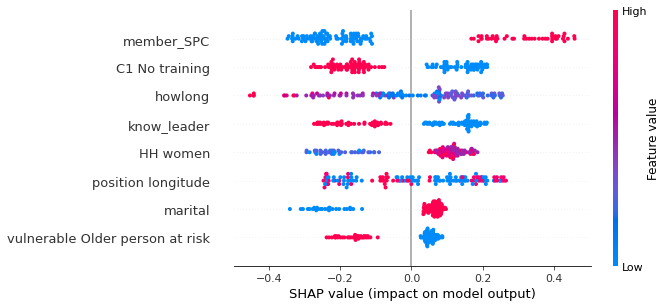

In [107]:
shap.summary_plot(svalues2,X, feature_names=a,max_display=8)

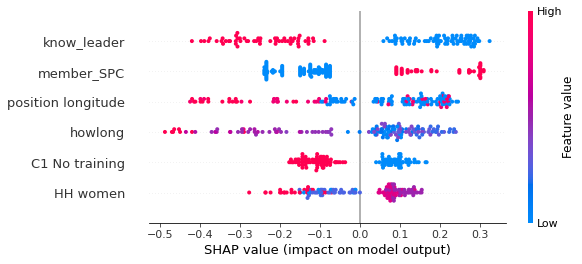

In [109]:
shap.summary_plot(svalues3,X, feature_names=a,max_display=6)

In [124]:
change

['change income', 'change foodsec', 'change2 LH', 'change2 food_access']

In [112]:
data2['region']

UniqueID
1      Ajuong Thok
2            Pamir
3            Pamir
4            Pamir
5            Pamir
          ...     
109    Ajuong Thok
110    Ajuong Thok
112    Ajuong Thok
117    Ajuong Thok
120    Ajuong Thok
Name: region, Length: 101, dtype: object

In [ ]:
# Graphs

In [177]:
sankey

['use1', 'use2', 'use3']

In [178]:
data2['use1'].value_counts()

Wheat flour          21
Rice                 20
Qhat                 15
Not form above       10
Clothes               7
Health                5
Meat                  4
Education             4
Tools                 4
Water                 3
Veg Oil               3
Milk                  2
School - Madrassa     2
Tea leaves            1
Fish                  1
Sorghum               1
Name: use1, dtype: int64

In [179]:
data2['use2'].value_counts()

Rice               18
Wheat flour        15
Sugar               8
Veg Oil             8
Fish                7
Qhat                7
Meat                6
Fruits              5
Education           5
0                   4
Milk                4
Tools               3
Not form above      3
Clothes             2
Salt                1
Kerozene            1
Health              1
Books               1
Pasta               1
Water               1
Tea leaves          1
School - Formal     1
Name: use2, dtype: int64

In [180]:
data2['use3'].value_counts()

Rice                 18
Wheat flour          13
Sugar                 9
Not form above        7
Health                7
Qhat                  7
Meat                  6
0                     5
Cow pea               5
Veg Oil               4
Milk                  3
Fish                  3
Fruits                3
Salt                  3
School - Madrassa     2
Tools                 1
Clothes               1
Sorghum               1
Soap                  1
Education             1
Books                 1
Water                 1
Kerozene              1
Name: use3, dtype: int64

In [170]:
data=pd.read_csv('DashBoard/viz.csv',sep='\t')
data[data.columns.to_list()[-20:]].head()

,age_mean,age_median,educ_mean,educ_highest,educ_median,contrib%,contrib_tot,femalecontrib%,age HHH,gender HHH,cfw_worker_HH%,cfw_worker_women%,cfw_worker_age_mean,cfw_worker_age_median,cashspend_HH_member_%,cashspend_Women%,cashspend_age_ponderated,Total_CFW_earned_USD,Total_CFW_earned_per_familymember,persons
0,33.5,30.0,Completed secondary school,Completed secondary school,Completed secondary school,50.000000,2,50.0,55,Male,25.000000,0.0,21.0,21.0,50.000000,50,47.0,150.0,25.000000,1.0
1,26.0,26.0,Completed secondary school,University,Completed secondary school,50.000000,1,0.0,27,Male,100.000000,0.0,28.5,28.5,50.000000,0,27.0,400.0,133.333333,1.0
2,35.5,35.5,Some secondary school,Completed secondary school,Some secondary school,50.000000,1,0.0,50,Male,50.000000,100.0,21.0,21.0,50.000000,0,50.0,7.0,2.333333,1.0
3,44.0,38.0,Completed primary school,Some secondary school,Some primary school,28.571429,2,0.0,73,Male,14.285714,100.0,56.0,56.0,28.571429,50,64.5,116.0,12.888889,1.0
4,31.5,31.5,Some secondary school,Completed secondary school,Some secondary school,50.000000,1,0.0,33,Male,50.000000,0.0,33.0,33.0,50.000000,0,33.0,82.0,20.500000,1.0


In [4]:
data['persons']=np.ones(len(data))

In [5]:
data[['Village_clean','use1','persons']].groupby(['Village_clean','use1']).count().unstack()

persons                        \
use1                                          Clothes Education Fish Health   
Village_clean                                                                 
Al-Samoud neighborhood alone, the martyr Badr     NaN       1.0  NaN    2.0   
Aljamie                                           1.0       NaN  NaN    1.0   
Alqatie                                           1.0       NaN  NaN    NaN   
Anma'                                             NaN       NaN  NaN    NaN   
Bayt bus                                          NaN       NaN  NaN    NaN   
Hadah                                             1.0       1.0  NaN    1.0   
Hayu aleumaal                                     NaN       NaN  1.0    1.0   
Sanea' alqadimuh                                  4.0       1.0  NaN    NaN   
Zubid                                             NaN       1.0  NaN    NaN   

                                                                             \
use1                                          Meat Milk Not form above Qhat   
Village_clean                                                                 
Al-Samoud neighborhood alone, the martyr Badr  NaN  1.0            NaN  1.0   
Aljamie                                        NaN  NaN            1.0  NaN   
Alqatie                                        NaN  1.0            3.0  5.0   
Anma'                                          NaN  NaN            6.0  4.0   
Bayt bus                                       3.0  NaN            NaN  5.0   
Hadah                                          NaN  NaN            NaN  NaN   
Hayu aleumaal                                  NaN  NaN            NaN  NaN   
Sanea' alqadimuh                               1.0  NaN            NaN  NaN   
Zubid                                          NaN  NaN            NaN  NaN   

                                                                               \
use1                                           Rice School - Madrassa Sorghum   
Village_clean                                                                   
Al-Samoud neighborhood alone, the martyr Badr   5.0               NaN     NaN   
Aljamie                                         1.0               NaN     1.0   
Alqatie                                         NaN               NaN     NaN   
Anma'                                           2.0               NaN     NaN   
Bayt bus                                        NaN               NaN     NaN   
Hadah                                           1.0               NaN     NaN   
Hayu aleumaal                                  10.0               NaN     NaN   
Sanea' alqadimuh                                NaN               2.0     NaN   
Zubid                                           1.0               NaN     NaN   

                                                                              \
use1                                          Tea leaves Tools Veg Oil Water   
Village_clean                                                                  
Al-Samoud neighborhood alone, the martyr Badr        NaN   NaN     NaN   NaN   
Aljamie                                              NaN   NaN     NaN   3.0   
Alqatie                                              NaN   2.0     NaN   NaN   
Anma'                                                NaN   NaN     1.0   NaN   
Bayt bus                                             NaN   2.0     NaN   NaN   
Hadah                                                NaN   NaN     2.0   NaN   
Hayu aleumaal                                        NaN   NaN     NaN   NaN   
Sanea' alqadimuh                                     1.0   NaN     NaN   NaN   
Zubid                                                NaN   NaN     NaN   NaN   

                                                           
use1                                          Wheat flour  
Village_clean                                              
Al-Samoud neighborhood alone, the 

In [9]:
def build_hierarchical_dataframe(df, levels, value_column, color_columns=None):
    """
    Build a hierarchy of levels for Sunburst or Treemap charts.

    Levels are given starting from the bottom to the top of the hierarchy,
    ie the last level corresponds to the root.
    """
    df_all_trees = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
    for i, level in enumerate(levels):
        df_tree = pd.DataFrame(columns=['id', 'parent', 'value', 'color'])
        dfg = df.groupby(levels[i:]).count()
        dfg = dfg.reset_index()
        df_tree['id'] = dfg[level].copy()
        if i < len(levels) - 1:
            df_tree['parent'] = dfg[levels[i+1]].copy()
        else:
            df_tree['parent'] = 'total'
        df_tree['value'] = dfg[value_column]
        df_tree['color'] = dfg[color_columns[0]] / dfg[color_columns[1]]
        df_all_trees = df_all_trees.append(df_tree, ignore_index=True)
    total = pd.Series(dict(id='total', parent='',
                              value=df[value_column].sum(),
                              color=df[color_columns[0]].sum() / df[color_columns[1]].sum()))
    df_all_trees = df_all_trees.append(total, ignore_index=True)
    return df_all_trees


In [47]:
fig=px.treemap(data[data['gender resp']=='Female'], path=['Village_clean', 'use1'],values='persons',color='use1')
fig.show()

In [27]:
# 1$=250YER
data['Total_CFW_earned_USD']=pd.DataFrame(data[['currency'+str(i) for i in range(1,8)]].applymap(lambda x: 1 if x=='USD' else 0).values*\
                                    data[['amount'+str(i) for i in range(1,8)]].values+data[['amount'+str(i) for i in range(1,8)]].values/250*\
                                    data[['currency'+str(i) for i in range(1,8)]].applymap(lambda x: 1 if x=='YER' else 0).values,\
                                    index=data.index).T.sum()


data['Total_CFW_earned_per_familymember']=data['Total_CFW_earned_USD']/data['totalhhcompo']


In [30]:
data[['Total_CFW_earned_USD']+[i for i in data if 'currency' in i or 'amount' in i ]][data['Total_CFW_earned_USD']>1000]

,Total_CFW_earned_USD,currency1,amount1,currency2,amount2,currency3,amount3,currency4,amount4,currency5,amount5,currency6,amount6,currency7,amount7
15,3360.0,YER,180000.0,YER,180000.0,YER,120000.0,YER,180000.0,YER,180000.0,0,0.0,0,0.0
23,4500.0,YER,375000.0,YER,375000.0,YER,375000.0,0,0.0,0,0.0,0,0.0,0,0.0
25,1176.0,YER,144000.0,YER,150000.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
26,5280.0,YER,180000.0,YER,228000.0,YER,228000.0,YER,228000.0,YER,228000.0,YER,228000.0,0,0.0
27,1548.0,YER,81000.0,YER,156000.0,YER,150000.0,0,0.0,0,0.0,0,0.0,0,0.0
28,2856.0,YER,114000.0,YER,144000.0,YER,144000.0,YER,144000.0,YER,144000.0,YER,24000.0,0,0.0
39,1152.0,YER,288000.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0
40,2520.0,YER,90000.0,YER,108000.0,YER,144000.0,YER,144000.0,YER,144000.0,0,0.0,0,0.0
42,2256.0,YER,188000.0,YER,188000.0,YER,188000.0,0,0.0,0,0.0,0,0.0,0,0.0
43,2016.0,YER,126000.0,YER,126000.0,YER,126000.0,YER,126000.0,0,0.0,0,0.0,0,0.0


In [43]:
df=data[data['gender HHH']=='Female'].copy()

In [44]:
categs=['Alqatie','Bayt bus','Hayu aleumaal','Hadah',"Anma'",'Aljamie','Al-Samoud',"Sanea' alqadimuh",'Zubid']
fig=go.Figure()
for categ in categs:
	fig.add_trace(go.Violin(x=df['Village_clean'][df['Village_clean'] == str(categ)],
	y=df['Total_CFW_earned_USD'][df['Village_clean'] == str(categ)],
	name=categ,
	box_visible=True,
	meanline_visible=True,points="all",))

fig.update_layout(showlegend=False)
fig.update_yaxes(range=[-0.1, df['Total_CFW_earned_USD'].max()+1])
fig.update_layout(yaxis={'title':'Total CFW earned in USD','title_font':{'size':18}})	


In [11]:
data['gender HHH']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
98     Male
99     Male
100    Male
101    Male
102    Male
Name: gender HHH, Length: 103, dtype: object

In [160]:
correl['use1_Qhat']

['usage23',
 'usage7',
 'usage6',
 'Total_CFW_earned_USD',
 'use1_Not form above',
 'usage11',
 'totalhhcompo',
 'cashspend_Women%',
 'diffcult_months September',
 'Village_clean_Al-Samoud neighborhood alone, the martyr Badr',
 'usage18',
 'usage3',
 'increased_exp Fish',
 'age HHH',
 'age_mean',
 'cfw_worker_HH%',
 'project_lasted',
 'educ_median',
 'Total_CFW_earned_per_familymember',
 'usage20']

In [166]:
df['use1_Qhat'].sum()

15

In [164]:
fig = px.violin(df, y='Total_CFW_earned_USD', x='use1_Qhat', box=True, points="all",
          hover_data=df.columns)
fig.show()

In [169]:
fig = px.violin(df, y='cashspend_Women%', x='use1_Qhat', box=True, points="all",
          hover_data=df.columns)
fig.show()

In [185]:
fig = px.violin(df, y='age HHH', x='use1_Qhat', box=True, points="all",
          hover_data=df.columns)
fig.show()


In [182]:
fig = px.violin(df, y='project_lasted', x='use1_Qhat', box=True, points="all",
          hover_data=df.columns)
fig.show()

'age_mean'

'age_mean'

In [174]:
fig = px.violin(data, x='usage23',y='Village_clean',  box=True, points="all")
fig.show()

In [ ]:
correl

In [161]:
correl['usage23']

['use1_Qhat',
 'increased_exp Qhat',
 'usage6',
 'Total_CFW_earned_USD',
 'increased_exp Meat',
 'usage14',
 'usage7',
 'diffcult_months March',
 'usage15',
 'diffcult_months July',
 'diffcult_months August',
 'usage8',
 'gender resp',
 'Village_clean_Al-Samoud neighborhood alone, the martyr Badr',
 'increased_exp Milk',
 'usage2',
 'increased_exp Rice',
 'usage3',
 'Head_Household',
 'usage4']

In [183]:
px.scatter(data,x='Total_CFW_earned_USD',y='usage23')

In [184]:
fig = px.violin(data, x='gender resp',y='usage23',  box=True, points="all")
fig.show()

In [19]:
fig=px.treemap(data[data['cashspend_Women%']>50], path=['Village_clean', 'use1'],values='persons',color='use1')
fig.show()

In [15]:
fig=px.treemap(data[data['cashspend_Women%']==0], path=['Village_clean', 'use1'],values='persons',color='use1')
fig.show()

In [10]:
fig=px.treemap(data[data['age HHH']<=35], path=['Village_clean', 'use1'],values='persons',color='use1')
fig.show()

In [13]:
data['Village_clean'].unique()

array(['Hadah', 'Al-Samoud neighborhood alone, the martyr Badr',
       'Alqatie', 'Bayt bus', "Sanea' alqadimuh", 'Aljamie',
       'Hayu aleumaal', "Anma'", 'Zubid'], dtype=object)

In [ ]:
['Alqatie','Hayu aleumaal',"Anma'",'Al-Samoud','Hadah','Aljamie',"Sanea' alqadimuh",'Zubid']

In [21]:
data[['region_clean','District_clean','Village_clean','persons']].groupby(['region_clean','District_clean','Village_clean']).count()

persons
region_clean     District_clean   Village_clean                                         
Alhadayda        Almurawaea       Alqatie                                             13
                 Zubid            Aljamie                                              1
Alhadiduh        Zubid            Aljamie                                             12
                                  Zubid                                                3
Amanah Aleasimuh Alamanih         Sanea' alqadimuh                                     1
                 Amanah aleasimuh Sanea' alqadimuh                                     2
                 Sanea' alqadima  Sanea' alqadimuh                                     7
Eden             Alshaeb          Anma'                                               13
                 Kritar           Al-Samoud neighborhood alone, the martyr Badr       12
Hadramawt        Almukalaa        Hayu aleumaal                                       13
Sana'a           Alsabeyn         Bayt bus                                            13
                                  Hadah                                               11
                 Sana'a           Hadah                                                2

In [19]:
data.columns.tolist()[-30:]

['learning1',
 'learning2',
 'learning3',
 'protection_learning1',
 'protection_learning2',
 'protection_learning3',
 'region_clean',
 'District_clean',
 'Village_clean',
 'male%',
 'age_mean',
 'age_median',
 'educ_mean',
 'educ_highest',
 'educ_median',
 'contrib%',
 'contrib_tot',
 'femalecontrib%',
 'age HHH',
 'gender HHH',
 'cfw_worker_HH%',
 'cfw_worker_women%',
 'cfw_worker_age_mean',
 'cfw_worker_age_median',
 'cashspend_HH_member_%',
 'cashspend_Women%',
 'cashspend_age_ponderated',
 'Total_CFW_earned_USD',
 'Total_CFW_earned_per_familymember',
 'persons']

In [23]:
a=data[[i for i in data if 'usage' in i[:6]]].T.sum().T

In [24]:
for feat in [i for i in data if 'usage' in i[:6]]:
    data[feat]=data[feat]/a*100
data[[i for i in data if 'usage' in i[:6]]].head(22)

,usage1,usage2,usage3,usage4,usage5,usage6,usage7,usage8,usage9,usage10,...,usage17,usage18,usage19,usage20,usage21,usage22,usage23,usage24,usage25,usage26
0,0.000000,22.147651,0.0,0.000000,22.147651,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,55.704698,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
1,0.000000,0.000000,0.0,25.252525,0.000000,0.000000,24.242424,0.000000,0.000000,0.000000,...,50.505051,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
2,0.000000,0.000000,0.0,33.333333,50.000000,16.666667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
3,0.000000,45.454545,0.0,0.000000,29.090909,0.000000,25.454545,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,14.634146,37.804878,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,47.560976,0.000000,0.0,0.000000
5,0.000000,12.903226,0.0,0.000000,0.000000,21.505376,33.333333,10.752688,10.752688,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,10.752688,0.000000,0.0,0.000000
6,0.000000,30.303030,0.0,0.000000,0.000000,0.000000,30.303030,0.000000,0.000000,0.000000,...,39.393939,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000
7,0.000000,18.292683,0.0,6.097561,0.000000,0.000000,18.292683,12.195122,6.097561,0.000000,...,6.097561,0.000000,6.097561,0.0,0.000000,0.0,12.195122,0.000000,0.0,9.146341
8,0.000000,0.000000,0.0,5.932203,5.084746,16.949153,16.949153,8.474576,4.237288,3.389831,...,8.474576,0.000000,0.000000,0.0,0.000000,0.0,16.949153,0.000000,0.0,6.779661
9,0.000000,62.305296,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,24.922118,...,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000


In [25]:
data.to_csv('DashBoard/viz.csv',sep='\t')

In [54]:
def sankey_graph(data,L,height=600,width=1600):
    """ sankey graph de data pour les catégories dans L dans l'ordre et 
    de hauter et longueur définie éventuellement"""
    
    nodes_colors=["blue","green","grey",'yellow',"coral",'darkviolet','saddlebrown','darkblue','brown']
    link_colors=["lightblue","limegreen","lightgrey","lightyellow","lightcoral",'plum','sandybrown','lightsteelblue','rosybrown']
    
    
    labels=[]
    source=[]
    target=[]
    
    for cat in L:
        lab=data[cat].unique().tolist()
        lab.sort()
        labels+=lab
    
    #st.write(labels)
    
    for i in range(len(data[L[0]].unique())): #j'itère sur mes premieres sources
    
        source+=[i for k in range(len(data[L[1]].unique()))] #j'envois sur ma catégorie 2
        index=len(data[L[0]].unique())
        target+=[k for k in range(index,len(data[L[1]].unique())+index)]
        
        for n in range(1,len(L)-1):
        
            source+=[index+k for k in range(len(data[L[n]].unique())) for j in range(len(data[L[n+1]].unique()))]
            index+=len(data[L[n]].unique())
            target+=[index+k for j in range(len(data[L[n]].unique())) for k in range(len(data[L[n+1]].unique()))]
       
    iteration=int(len(source)/len(data[L[0]].unique()))
    value_prov=[(int(i//iteration),source[i],target[i]) for i in range(len(source))]
    
    
    value=[]
    k=0
    position=[]
    for i in L:
        k+=len(data[i].unique())
        position.append(k)
    
   
    
    for triplet in value_prov:    
        k=0
        while triplet[1]>=position[k]:
            k+=1
        
        df=data[data[L[0]]==labels[triplet[0]]].copy()
        df=df[df[L[k]]==labels[triplet[1]]]
        #Je sélectionne ma première catégorie
        value.append(len(df[df[L[k+1]]==labels[triplet[2]]]))
        
    color_nodes=nodes_colors[:len(data[L[0]].unique())]+["black" for i in range(len(labels)-len(data[L[0]].unique()))]
    #st.write(color_nodes)
    color_links=[]
    for i in range(len(data[L[0]].unique())):
    	color_links+=[link_colors[i] for couleur in range(iteration)]
    #st.write(L,len(L),iteration)
    #st.write(color_links)
   
   
    fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 30,
      line = dict(color = "black", width = 1),
      label = [i.upper() for i in labels],
      color=color_nodes
      )
      
    ,
    link = dict(
      source = source, # indices correspond to labels, eg A1, A2, A1, B1, ...
      target = target,
      value = value,
      color = color_links))])
    return fig


In [26]:
data['educ_mean'].unique()

array(['Completed secondary school', 'Some secondary school',
       'Completed primary school', 'Koranic school',
       'Some primary school', 'University'], dtype=object)

In [27]:
['Koranic school','Some primary school','Completed primary school','Some secondary school','Completed secondary school','University']

['Koranic school',
 'Some primary school',
 'Completed primary school',
 'Some secondary school',
 'Completed secondary school',
 'University']

In [86]:
question.loc['usage1']['question']

'Sorghum'

In [87]:
df=pd.DataFrame(columns=['usage','percentage'])
for i in range(1,27):
    dftemp=pd.DataFrame(columns=['usage','village','percentage'])
    dftemp['usage']=np.ones(len(data))
    dftemp['usage']=dftemp['usage'].apply(lambda x:question.loc['usage'+str(i)]['question'])
    dftemp['percentage']=data['usage'+str(i)]
    dftemp['village']=data['Village_clean']
    df=df.append(dftemp)

In [88]:
df

,usage,percentage,village
0,Sorghum,0.0,Hadah
1,Sorghum,0.0,Hadah
2,Sorghum,0.0,Hadah
3,Sorghum,0.0,Hadah
4,Sorghum,0.0,"Al-Samoud neighborhood alone, the martyr Badr"
...,...,...,...
98,Education,0.0,Anma'
99,Education,0.0,Anma'
100,Education,0.0,Anma'
101,Education,0.0,Aljamie


In [37]:
df['usage'].unique()

array(['usage1', 'usage2', 'usage3', 'usage4', 'usage5', 'usage6',
       'usage7', 'usage8', 'usage9', 'usage10', 'usage11', 'usage12',
       'usage13', 'usage14', 'usage15', 'usage16', 'usage17', 'usage18',
       'usage19', 'usage20', 'usage21', 'usage22', 'usage23', 'usage24',
       'usage25', 'usage26'], dtype=object)

In [52]:
df=df[df['percentage']>0]

In [47]:
df

,usage,village,percentage
15,usage1,Alqatie,3.058104
17,usage1,Alqatie,8.403361
30,usage1,Sanea' alqadimuh,30.434783
42,usage1,Aljamie,2.656748
43,usage1,Aljamie,11.904762
...,...,...,...
56,usage26,Anma',4.844291
63,usage26,"Al-Samoud neighborhood alone, the martyr Badr",16.949153
68,usage26,Sanea' alqadimuh,60.606061
77,usage26,Bayt bus,7.282154


<Figure size 432x288 with 0 Axes>

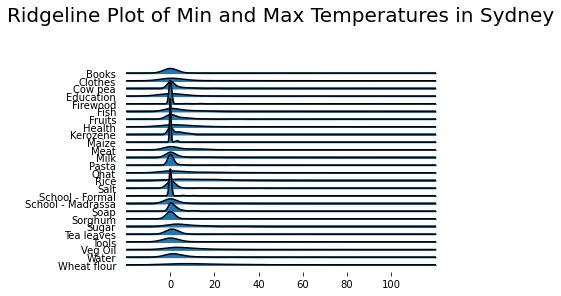

In [89]:
from joypy import joyplot
fig=plt.figure()

ax, fig = joyplot(
    data=df, 
    by='usage',
    
)
plt.title('Ridgeline Plot of Min and Max Temperatures in Sydney', fontsize=20)
plt.show()

In [77]:
sank=data[sankey].copy()

In [78]:
sank['use1'].value_counts()

Wheat flour          21
Rice                 20
Qhat                 15
Not form above       10
Clothes               7
Health                5
Meat                  4
Education             4
Tools                 4
Veg Oil               3
Water                 3
Milk                  2
School - Madrassa     2
Sorghum               1
Fish                  1
Tea leaves            1
Name: use1, dtype: int64

In [79]:
L=['Wheat flour','Rice','Qhat','Tools','Clothes','Health','Meat','Education']

In [80]:
sank['use1']=sank['use1'].apply(lambda x:x if x in L else 'Other')

In [81]:
sankey_graph(sank,sank.columns.to_list(),height=600,width=1600)

In [90]:
[i for i in data if 'reason' in i]

['reasonJan',
 'reasonFeb',
 'reasonMar',
 'reasonApril',
 'reasonMay',
 'reasonJune',
 'reasonJuly',
 'reasonAug',
 'reasonSep',
 'reasonOct',
 'reasonNov',
 'reasonDec']

In [91]:
feats=[i for i in data if 'reason' in i]
df = data[feats].copy()

,reasonJan,reasonFeb,reasonMar,reasonApril,reasonMay,reasonJune,reasonJuly,reasonAug,reasonSep,reasonOct,reasonNov,reasonDec
0,,,,,,The reason is that the work is postponed and t...,,,,,,
1,,,,"Expenses increase during the month of Ramadan,...","Expenses increase during the month of Ramadan,...",,,,,,,
2,,,,,,,,,,,There are no jobs at the end of the year,
3,,,,,,,,,,,"Because of the difference in prices, high pric...","Because of the difference in prices, high pric..."
4,I don't have a job,Unavailability of household expenses,Unavailability of household expenses,My family went through a period of illness,,,"I have a job, but for a short period of time a...",non. Provides family expenses,No expense,Unavailability of household expenses,Unavailability of expenses,Unavailability of expenses due to lack of work...
...,...,...,...,...,...,...,...,...,...,...,...,...
98,,,,,,,Transportation from one house to another,,,,,
99,,,No source of income,,,,,,,,,
100,Inability to pay house rent,,,,,,,,,,,
101,I didn't get any work,,,,,,,,,,,
